# **PERBANDINGAN LAJU PERTUMBUHAN INFEKSI COVID-19 DI BEBERAPA NEGARA**

Oleh : Samatha Marhaendra Putra (19/444071/TK/49267) (Kelas B)

# A. PENDAHULUAN

Pada notebook ini, saya mencoba melakukan analisis numeris untuk menentukan laju pertumbuhan infeksi COVID-19 dan perbandingannya di beberapa negara, di antaranya yaitu Tiongkok, Korea Selatan, Italia, Iran, Spanyol, Jerman, Australia, Amerika Serikat, dan Indonesia. Dataset yang dipakai bersumber dari https://www.worldometers.info/coronavirus/.

# B. IMPOR PUSTAKA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualisasi data
import matplotlib.patches as mpatches # memberi warna pada legenda
import math

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# D. IMPOR DATA

In [2]:
#1. CHINA Dataset
#Date for China only 
date_chi_up = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27)) #Pertumbuhan(22 Jan - 17 Feb)
date_chi_down = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39)) #Penurunan(17 Feb - 26 Mar)
date_chi_dth = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65)) #Total Deaths(22 Jan - 26 Mar)
#China: Active Cases (Pertumbuhan)
chi_act_up = np.array((554,771,1208,1870,2613,4349,5739,7417,9308,11289,13748,16369,19383,22942,26302,28985,31774,33738,35982,37626,38791,51591,55748,56873,57416,57934,58016))
#China: Active Cases (Penurunan)
chi_act_down = np.array((58016,57805,56301,54921,53284,52093,49824,47765,45600,43258,39919,37414,35129,32616,30004,27423,25353,23784,22179,20533,19016,17721,16136,14831,13524,12088,10733,9893,8967,8056,7263,6569,6013,5353,5120,4735,4287,3947,3460))
#China: Total Deaths
chi_dth = np.array((17,25,41,56,80,106,132,170,213,259,304,361,425,490,563,636,722,811,908,1016,1113,1259,1380,1523,1665,1770,1868,2004,2118,2236,2345,2442,2592,2663,2715,2744,2788,2835,2870,2912,2943,2981,3012,3042,3070,3097,3119,3136,3158,3169,3176,3189,3199,3213,3226,3237,3245,3248,3255,3261,3270,3277,3281,3287,3292))
#China: Active Cases (Pertumbuhan & Penurunan)
chi_act_updown = np.concatenate

#2. SOUTH KOREA Dataset
#Date for South Korea only 
date_kor_up = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26)) #Pertumbuhan(15 Feb - 11 Mar)
date_kor_down = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16)) #Penurunan(11 Mar - 26 Mar)
date_kor_dth = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36)) #Total Deaths(20 Feb - 26 Mar)
#S.Korea: Active Cases (Pertumbuhan)
kor_act_up = np.array((19,20,20,19,42,94,190,416,578,803,944,1225,1729,2297,3109,3685,4277,5120,5498,6107,6415,6875,7097,7178,7165,7362))
#S.Korea: Active Cases (Penurunan)
kor_act_down = np.array((7362,7293,7198,7180,7253,7024,6838,6789,6527,6325,6085,5884,5684,5410,5281,4966))
#S.Korea: Total Deaths
kor_dth = np.array((1,2,2,6,8,11,12,13,16,17,21,28,32,35,42,43,48,50,53,60,60,66,67,72,75,75,81,84,91,94,102,104,111,120,126,131))

#3. ITALY Dataset
#Date for Italy only
date_ita_act = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41)) #Active Cases (15 Feb - 26 Mar)
date_ita_dth = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35)) #Total Deaths (21 Feb - 26 Mar)
#Italy: Active Cases 
ita_act = np.array((3,3,3,3,3,4,19,75,152,221,310,455,593,822,1049,1577,1835,2263,2706,3296,3916,5061,6387,7985,8514,10590,12839,14955,17750,20603,23073,26062,28710,33190,37860,42681,46638,50418,54030,57521,62013))
#Italy: Total Deaths
ita_dth = np.array((1,2,3,7,11,12,17,21,29,41,52,79,107,148,197,233,366,463,631,827,1016,1266,1441,1809,2158,2503,2978,3405,4032,4825,5476,6077,6820,7503,8215))

#4. IRAN Dataset
#Date for Iran only
date_iran_act = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36)) #Active Cases (20 Feb - 26 Mar)
date_iran_dth = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37)) #Total Deaths (19 Feb - 26 Mar)   
#Iran: Active Cases
iran_act = np.array((3,14,23,34,46,54,95,165,281,427,749,1144,1824,2278,2666,3710,4009,4238,4530,5020,5687,6370,7321,7779,8624,9142,9792,10516,11144,11466,11419,12040,12861,13964,15315,16715))
#Iran: Total Deaths
iran_dth = np.array((2,2,4,6,8,12,16,19,26,34,43,54,66,77,92,108,124,145,194,237,291,354,429,514,611,724,853,988,1135,1284,1433,1556,1685,1812,1934,2077,2234))

#5. SPAIN Dataset
#Date for Spain only
date_spa_act = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32)) #Active Cases (24 Feb - 26 Mar)
date_spa_dth = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)) #Total Deaths (3 Mar - 26 Mar)
#Spain: Active Cases
spa_act = np.array((1,7,11,23,31,56,82,118,162,224,276,387,485,625,1169,1524,2039,2871,4906,5678,7177,9070,10265,13050,16139,18890,21990,24421,29470,35273,40501,46406))
#Spain: Total Deaths
spa_dth = np.array((1,2,3,8,10,17,30,36,55,86,133,196,294,342,533,638,831,1093,1381,1772,2311,2991,3647,4365))

#6. GERMANY Dataset
#Date for Germany only
date_ger_act = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41)) #Active Cases (15 Feb - 26 Mar)
date_ger_dth = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18)) #Total Deaths (9 Mar - 26 Mar)
#Germany: Active Cases
ger_act = np.array((13,13,9,7,7,3,2,2,2,2,3,11,32,58,63,114,149,187,246,528,652,782,1022,1204,1545,1938,2714,3621,4544,5754,7188,9274,12194,15161,19600,22071,24513,28480,29542,33570,37998))
#Germany: Total Deaths
ger_dth = np.array((2,2,3,6,8,9,13,17,26,28,44,68,84,94,123,159,206,267))

#7. AUSTRALIA Dataset
#Date for Australia only
date_aus_act = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41)) #Active Cases (15 Feb - 26 Mar)
date_aus_dth = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26)) #Total Deaths (1 Mar - 26 Mar)
#Australia: Active Cases
aus_act = np.array((5,5,5,5,5,6,8,10,11,11,7,8,8,10,10,13,17,17,30,36,39,49,58,68,91,101,127,170,218,268,369,423,547,703,875,1019,1514,1762,2191,2547,2867))
#Australia: Total Deaths
aus_dth = np.array((1,1,1,2,2,2,3,3,3,3,3,3,3,3,5,5,5,6,7,7,7,7,7,8,11,13))

#8. USA Dataset
#Date for USA only
date_usa_act = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41)) #Active Cases (15 Feb - 26 Mar)
date_usa_dth = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27)) #Total Deaths (29 Feb - 26 Mar)
#USA: Active Cases
usa_act = np.array((12,12,12,12,12,10,29,29,28,48,51,54,54,57,60,65,85,106,138,200,289,401,504,663,949,1248,1581,2126,2664,3484,4434,6127,8940,13464,18965,23720,33000,42930,53697,66790,82272))
#USA: Total Deaths
usa_dth = np.array((1,1,6,9,11,12,15,19,22,26,30,38,41,48,57,69,87,110,150,206,255,301,414,555,780,1027,1295))

#1. INDONESIA Dataset
#Date for Indonesia only
date_ina_act = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25)) #Active Cases (2 Feb - 26 Mar)
date_ina_dth = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16)) #Total Deaths (11 Feb - 26 Mar)
#Indonesia: Active Cases
ina_act = np.array((2,2,2,2,4,4,6,19,25,31,30,60,83,104,121,156,197,269,320,392,437,500,601,701,780))
#Indonesia: Total Deaths
ina_dth = np.array((1,1,4,5,5,5,7,19,25,32,38,48,49,55,58,78))

# E. ANALISIS DATA

# E.1. Tiongkok

## E.1.a. Tiongkok (Data *Active Cases*)

**1. Regresi Berpangkat**

1.a. Kurva Pertumbuhan

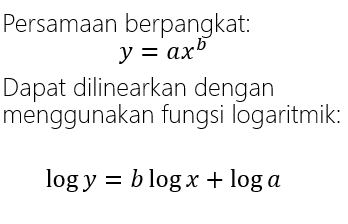
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* (Pertumbuhan) di Tiongkok, dan x adalah tanggalnya.

In [3]:
y = chi_act_up
x = date_chi_up

In [4]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
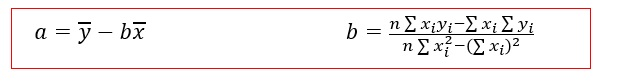

In [5]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [6]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

1.6591802001040628

In [7]:
A = p.mean()-B*q.mean()
A

2.4186802338126343

In [8]:
a = 10**A #A=log(a)
b = B

In [9]:
print("Persamaan Berpangkat (Tiongkok - Active Cases - Pertumbuhan):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Tiongkok - Active Cases - Pertumbuhan):
y = (262.2287)x^(1.6592)


menghitung koefisien korelasi menggunakan rumus berikut:
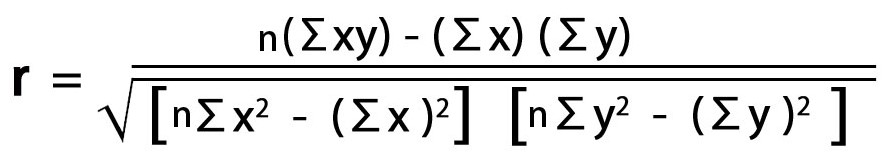

In [10]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Tiongkok - Active Cases - Pertumbuhan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_chi_up_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Tiongkok - Active Cases - Pertumbuhan) adalah:
R = 0.9894 dan R^2 = 0.9789


visualisasi grafik persamaan berpangkat (Tiongkok - *Active Cases* - Pertumbuhan)

In [11]:
xreg = np.array(range(0,int(x[-1]+1)*10))
xreg = xreg/10 #bertujuan untuk memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

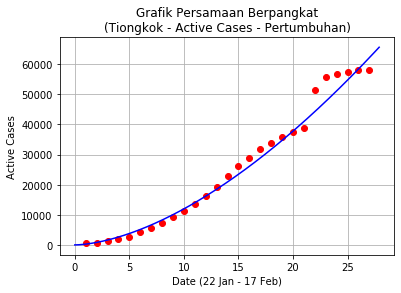

In [12]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Tiongkok - Active Cases - Pertumbuhan)')
plt.xlabel('Date (22 Jan - 17 Feb)')
plt.ylabel('Active Cases')

1.b. Kurva Penurunan

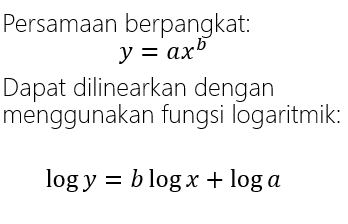
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* (Penurunan) di Tiongkok, dan x adalah tanggalnya.

In [13]:
y = chi_act_down
x = date_chi_down

In [14]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
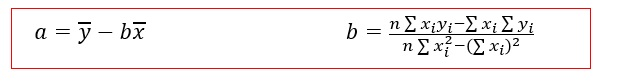

In [15]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [16]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

-0.8849597059758034

In [17]:
A = p.mean()-B*q.mean()
A

5.308804945861992

In [18]:
a = 10**A # A=log(a)
b = B

In [19]:
print("Persamaan Berpangkat (Tiongkok - Active Cases - Penurunan):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Tiongkok - Active Cases - Penurunan):
y = (203612.7389)x^(-0.8850)


menghitung koefisien korelasi menggunakan rumus berikut:
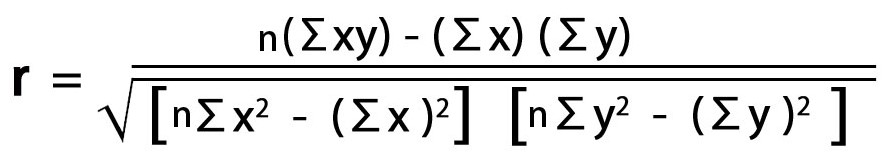

In [20]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Tiongkok - Active Cases - Penurunan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_chi_down_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Tiongkok - Active Cases - Penurunan) adalah:
R = -0.8556 dan R^2 = 0.7321


visualisasi grafik persamaan berpangkat (Tiongkok - *Active Cases* - Penurunan)

In [21]:
xreg = np.array(range(1,int(x[-1]+1)))
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

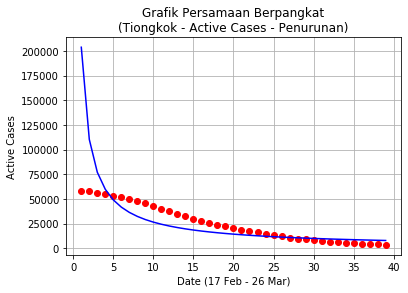

In [22]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Tiongkok - Active Cases - Penurunan)')
plt.xlabel('Date (17 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**2. Regresi Eksponensial**

2.a. Kurva Pertumbuhan

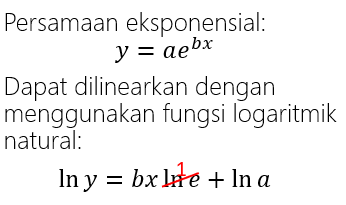
persamaan berikut dapat ditulis menjadi:
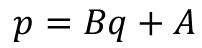

In [23]:
y = chi_act_up
x = date_chi_up

In [24]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
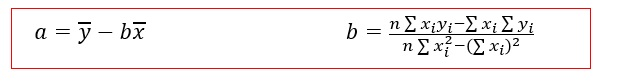

In [25]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [26]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.16756689028354152

In [27]:
A = p.mean()-B*q.mean()
A

7.190413544807566

In [28]:
a = np.e**A # A=log(a)
b = B

In [29]:
print("Persamaan Eksponensial (Tiongkok - Active Cases - Pertumbuhan):")
print("y = {:.4f}e^({:.4f}x)".format(a,b))

Persamaan Eksponensial (Tiongkok - Active Cases - Pertumbuhan):
y = 1326.6517e^(0.1676x)


menghitung koefisien korelasi menggunakan rumus berikut:
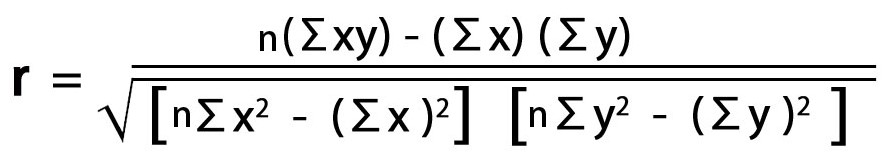

In [30]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Tiongkok - Active Cases - Pertumbuhan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_chi_up_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Tiongkok - Active Cases - Pertumbuhan) adalah:
R = 0.9428 dan R^2 = 0.8889


visualisasi grafik persamaan eksponensial (Tiongkok - *Active Cases* - Pertumbuhan)

In [31]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Active Cases')

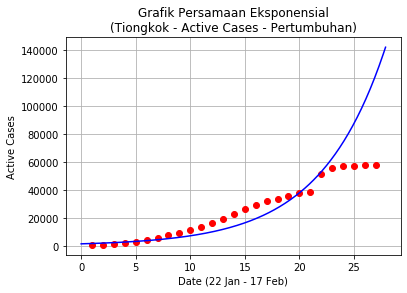

In [32]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Tiongkok - Active Cases - Pertumbuhan)')
plt.xlabel('Date (22 Jan - 17 Feb)')
plt.ylabel('Active Cases')

2.b. Kurva Penurunan

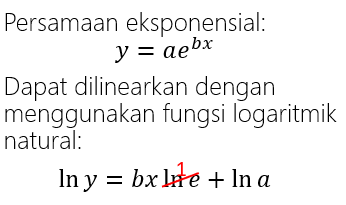
persamaan berikut dapat ditulis menjadi:
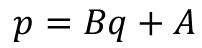

In [33]:
y = chi_act_down
x = date_chi_down

In [34]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
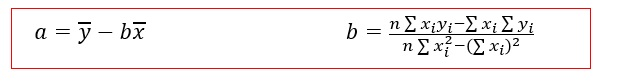

In [35]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [36]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

-0.07835187543302591

In [37]:
A = p.mean()-B*q.mean()
A

11.371402094822034

In [38]:
a = np.e**A # A=log(a)
b = B

In [39]:
print("Persamaan Eksponensial (Tiongkok - Active Cases - Penurunan):")
print("y = {:.4f}e^({:.4f}x)".format(a,b))

Persamaan Eksponensial (Tiongkok - Active Cases - Penurunan):
y = 86803.4889e^(-0.0784x)


menghitung koefisien korelasi menggunakan rumus berikut:
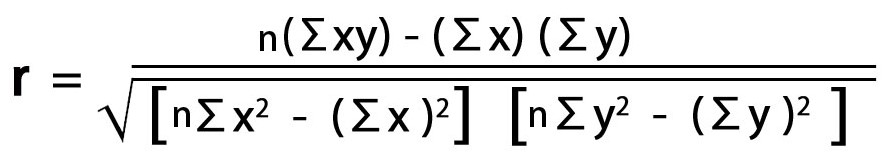

In [40]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Tiongkok - Active Cases - Penurunan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_chi_down_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Tiongkok - Active Cases - Penurunan) adalah:
R = -0.9911 dan R^2 = 0.9822


visualisasi grafik persamaan eksponensial (Tiongkok - *Active Cases* - Penurunan)

In [41]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Active Cases')

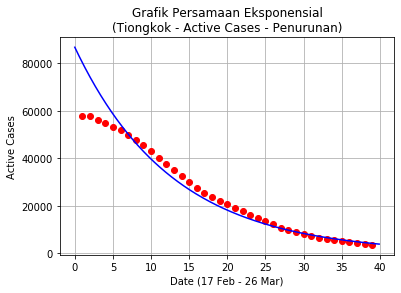

In [42]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Tiongkok - Active Cases - Penurunan)')
plt.xlabel('Date (17 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**3. Regresi Polinomial (Orde 3)**

3.a. Kurva Pertumbuhan

In [43]:
y = chi_act_up
x = date_chi_up

membuat matriks A dan B

In [44]:
#Matriks A
A = np.zeros((4, 4), dtype = 'float')
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[2.70000000e+01, 3.78000000e+02, 6.93000000e+03, 1.42884000e+05],
       [3.78000000e+02, 6.93000000e+03, 1.42884000e+05, 3.14206200e+06],
       [6.93000000e+03, 1.42884000e+05, 3.14206200e+06, 7.19659080e+07],
       [1.42884000e+05, 3.14206200e+06, 7.19659080e+07, 1.69521759e+09]])

In [45]:
#Matriks B
B = np.zeros((1, 4), dtype = 'float')
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[ 6.88336000e+05,  1.38161480e+07,  2.97858342e+08,
        -1.87399691e+09]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [46]:
A = np.array([[2.70000000e+01, 3.78000000e+02, 6.93000000e+03, 1.42884000e+05],
       [3.78000000e+02, 6.93000000e+03, 1.42884000e+05, 3.14206200e+06],
       [6.93000000e+03, 1.42884000e+05, 3.14206200e+06, 7.19659080e+07],
       [1.42884000e+05, 3.14206200e+06, 7.19659080e+07, 1.69521759e+09]], dtype = 'float')
b = np.array([[ 6.88336000e+05,  1.38161480e+07,  2.97858342e+08,
        -1.87399691e+09]], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - m * b

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - m * b
        
X = Ab[:, 4]
X

array([ 2.54939259e+04,  1.38161480e+07,  2.97858342e+08, -1.87399691e+09])

In [47]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [48]:
print("Persaman Regresi Polinomial (Orde 3) (Tiongkok - Active Cases - Pertumbuhan)")
print("y = ({:.4f})x^3 + {:.4f}x^2 + {:.4f}x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Tiongkok - Active Cases - Pertumbuhan)
y = (-1873996910.0000)x^3 + 297858342.0000x^2 + 13816148.0000x + 25493.9259


In [49]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg

array([-1.56229693e+09, -1.37728841e+10, -4.78757176e+10, -1.15114779e+11,
       -2.26734049e+11, -3.93977510e+11, -6.28089143e+11, -9.40312929e+11,
       -1.34189285e+12, -1.84407289e+12, -2.45809702e+12, -3.19520924e+12,
       -4.06665352e+12, -5.08367383e+12, -6.25751418e+12, -7.59941852e+12,
       -9.12063086e+12, -1.08323952e+13, -1.27459554e+13, -1.48725556e+13,
       -1.72234397e+13, -1.98098517e+13, -2.26430355e+13, -2.57342353e+13,
       -2.90946948e+13, -3.27356582e+13, -3.66683694e+13])

menghitung koefisien korelasi

In [50]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Tiongkok - Active Cases - Pertumbuhan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Tiongkok - Active Cases - Pertumbuhan) adalah:
R = 728650763.1554 dan R^2 = 530931934646914752.0000


visualisasi persamaan polinomial

Text(0, 0.5, 'Active Cases')

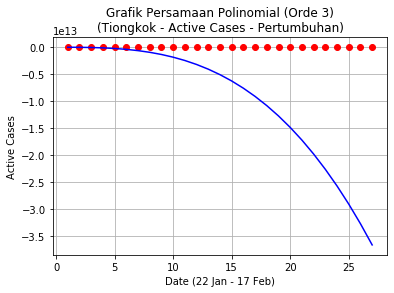

In [51]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Tiongkok - Active Cases - Pertumbuhan)')
plt.xlabel('Date (22 Jan - 17 Feb)')
plt.ylabel('Active Cases')

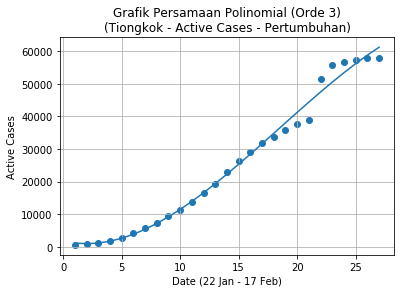

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Tiongkok - Active Cases - Pertumbuhan) adalah:
R = 0.9945 dan R^2 = 0.9890


In [52]:
#karena hasil yang didapat jauh sekali dari hasil sebenarnya, terpaksa saya menggunakan fungsi yang sudah ada di scikit-learn sebagai pembetulannya

model1 = np.poly1d(np.polyfit(x, y, 3))

line1 = np.linspace(1, 27, 27)

plt.scatter(x, y)
plt.plot(line1, model1(line1))
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Tiongkok - Active Cases - Pertumbuhan)')
plt.xlabel('Date (22 Jan - 17 Feb)')
plt.ylabel('Active Cases')
plt.show()

import sklearn
from sklearn.metrics import r2_score
r = np.sqrt(r2_score(y, model1(x)))
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Tiongkok - Active Cases - Pertumbuhan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_chi_up_3 = r**2
yreg_chi_act_up = model1(line1)

3.b. Kurva Penurunan

In [53]:
y = chi_act_down
x = date_chi_down

membuat matriks A dan B

In [54]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[ 3.9000000e+01,  7.8000000e+02,  2.0540000e+04,  6.0840000e+05],
       [ 7.8000000e+02,  2.0540000e+04,  6.0840000e+05,  1.9221332e+07],
       [ 2.0540000e+04,  6.0840000e+05,  1.9221332e+07,  6.3253320e+08],
       [ 6.0840000e+05,  1.9221332e+07,  6.3253320e+08, -6.5932860e+07]])

In [55]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[9.90933000e+05, 1.19426120e+07, 2.22691196e+08, 9.16328854e+08]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [56]:
A = np.array([[ 3.9000000e+01,  7.8000000e+02,  2.0540000e+04,  6.0840000e+05],
       [ 7.8000000e+02,  2.0540000e+04,  6.0840000e+05,  1.9221332e+07],
       [ 2.0540000e+04,  6.0840000e+05,  1.9221332e+07,  6.3253320e+08],
       [ 6.0840000e+05,  1.9221332e+07,  6.3253320e+08, -6.5932860e+07]])
b = np.array([9.90933000e+05, 1.19426120e+07, 2.22691196e+08, 9.16328854e+08])

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - m * b
        
for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - m * b
        
X = Ab[:, 4]
X

array([ 6.52797777e+04, -2.66998043e+03,  1.98151848e+01,  1.98228982e-01])

In [57]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [58]:
print("Persaman Regresi Polinomial (Orde 3) (Tiongkok - Active Cases - Penurunan)")
print("y = {:.4f}x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Tiongkok - Active Cases - Penurunan)
y = 0.1982x^3 + 19.8152x^2 + (-2669.9804)x + 65279.7777


In [59]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_chi_act_down = yreg
yreg_chi_act_down

array([62629.8106485 , 60020.6633735 , 57453.52521587, 54929.58554951,
       52450.03374829, 50016.05918611, 47628.85123687, 45289.59927444,
       42999.49267273, 40759.72080562, 38571.473047  , 36435.93877076,
       34354.30735079, 32327.76816098, 30357.51057522, 28444.72396741,
       26590.59771142, 24796.32118116, 23063.08375051, 21392.07479337,
       19784.48368361, 18241.49979514, 16764.31250184, 15354.1111776 ,
       14012.08519632, 12739.42393187, 11537.31675817, 10406.95304908,
        9349.5221785 ,  8366.21352033,  7458.21644846,  6626.72033676,
        5872.91455914,  5197.98848949,  4603.13150168,  4089.53296962,
        3658.3822672 ,  3310.8687683 ,  3048.18184681])

menghitung koefisien korelasi

In [60]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_chi_act_down))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Tiongkok - Active Cases - Penurunan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_chi_down_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Tiongkok - Active Cases - Penurunan) adalah:
R = 0.9973 dan R^2 = 0.9947


visualisasi persamaan polinomial

Text(0, 0.5, 'Active Cases')

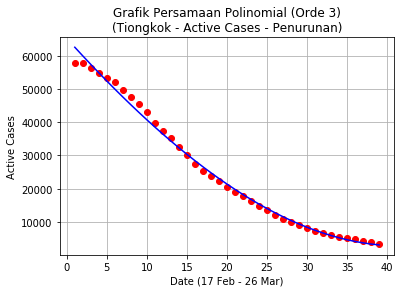

In [61]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_chi_act_down,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Tiongkok - Active Cases - Penurunan)')
plt.xlabel('Date (17 Feb - 26 Mar)')
plt.ylabel('Active Cases')

## E.1.b. Tiongkok (Data Total Deaths)

**1. Regresi Berpangkat**

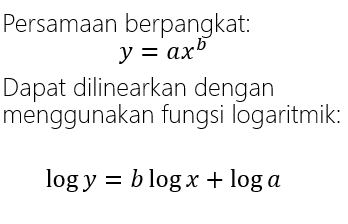
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Total Deaths* di Tiongkok, dan x adalah tanggalnya.

In [62]:
y = chi_dth
x = date_chi_dth

In [63]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
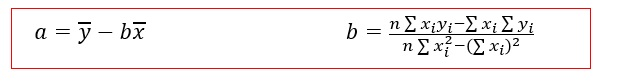

In [64]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [65]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

1.4839734109707599

In [66]:
A = p.mean()-B*q.mean()
A

1.0115984588258957

In [67]:
a = 10**A # A=log(a)
b = B

In [68]:
print("Persamaan Berpangkat (Tiongkok - Total Deaths):")
print("y = {:.4f}x^({:.4f})".format(a,b))

Persamaan Berpangkat (Tiongkok - Total Deaths):
y = 10.2707x^(1.4840)


menghitung koefisien korelasi menggunakan rumus berikut:
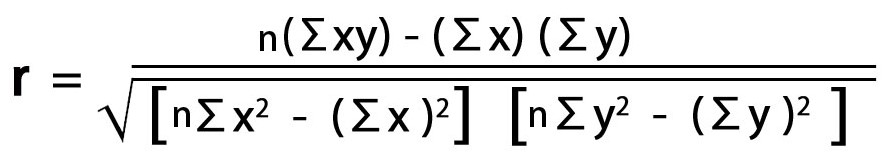

In [69]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Tiongkok - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_chi_dth_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Tiongkok - Total Deaths) adalah:
R = 0.9833 dan R^2 = 0.9668


visualisasi grafik persamaan berpangkat (Tiongkok - *Total Deaths*)

In [70]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Total Deaths')

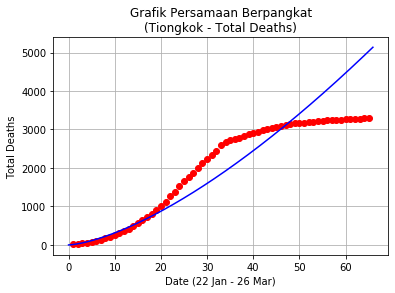

In [71]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Tiongkok - Total Deaths)')
plt.xlabel('Date (22 Jan - 26 Mar)')
plt.ylabel('Total Deaths')

**2. Regresi Eksponensial**

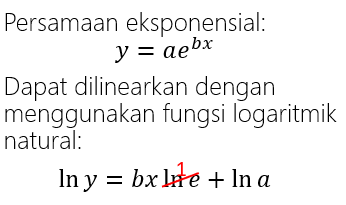
persamaan berikut dapat ditulis menjadi:
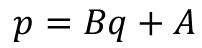

In [72]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
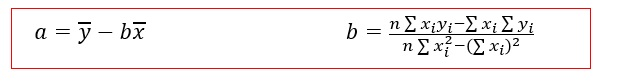

In [73]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [74]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.06137642776029384

In [75]:
A = p.mean()-B*q.mean()
A

5.083236069523242

In [76]:
a = np.e**A # A=log(a)
b = B

In [77]:
print("Persamaan Eksponensial (Tiongkok - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Tiongkok - Total Deaths):
y = (161.2952)x^(0.0614)


menghitung koefisien korelasi menggunakan rumus berikut:
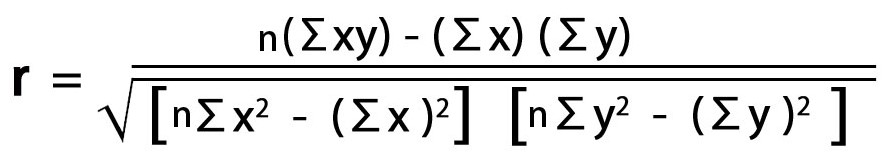

In [78]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Tiongkok - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_chi_dth_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Tiongkok - Total Deaths) adalah:
R = 0.8491 dan R^2 = 0.7210


visualisasi grafik persamaan eksponensial (Tiongkok - *Total Deaths*)

In [79]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Total Deaths')

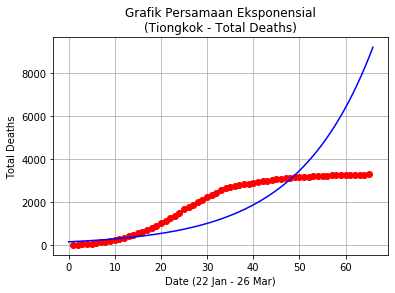

In [80]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Tiongkok - Total Deaths)')
plt.xlabel('Date (22 Jan - 26 Mar)')
plt.ylabel('Total Deaths')

**3. Regresi Polinomial (Orde 3)**

In [81]:
y = chi_dth
x = date_chi_dth

membuat matriks A dan B

In [82]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[ 6.50000000e+01,  2.14500000e+03,  9.36650000e+04,
         4.60102500e+06],
       [ 2.14500000e+03,  9.36650000e+04,  4.60102500e+06,
         2.41074977e+08],
       [ 9.36650000e+04,  4.60102500e+06,  2.41074977e+08,
         2.72495937e+08],
       [ 4.60102500e+06,  2.41074977e+08,  2.72495937e+08,
        -1.26559967e+08]])

In [83]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[1.30560000e+05, 5.73790500e+06, 2.76864517e+08, 1.31892629e+09]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [84]:
A = np.array([[ 6.50000000e+01,  2.14500000e+03,  9.36650000e+04,
         4.60102500e+06],
       [ 2.14500000e+03,  9.36650000e+04,  4.60102500e+06,
         2.41074977e+08],
       [ 9.36650000e+04,  4.60102500e+06,  2.41074977e+08,
         2.72495937e+08],
       [ 4.60102500e+06,  2.41074977e+08,  2.72495937e+08,
        -1.26559967e+08]], dtype = 'float')
b = np.array([1.30560000e+05, 5.73790500e+06, 2.76864517e+08, 1.31892629e+09], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 7.76726458e+02, -1.05356513e+01,  1.04661374e+00,  1.00861787e-03])

In [85]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [86]:
print("Persaman Regresi Polinomial (Orde 3) (Tiongkok - Total Deaths)")
print("y = {:.4f}x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Tiongkok - Total Deaths)
y = 0.0010x^3 + 1.0466x^2 + (-10.5357)x + 776.7265


In [87]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg

array([ 767.2384293 ,  759.84967952,  754.56626063,  751.39422436,
        750.3396224 ,  751.40850647,  754.60692827,  759.9409395 ,
        767.41659188,  777.03993712,  788.81702691,  802.75391297,
        818.856647  ,  837.13128072,  857.58386582,  880.22045402,
        905.04709703,  932.06984654,  961.29475427,  992.72787193,
       1026.37525121, 1062.24294384, 1100.33700151, 1140.66347594,
       1183.22841882, 1228.03788187, 1275.0979168 , 1324.41457531,
       1375.99390911, 1429.84196991, 1485.96480941, 1544.36847932,
       1605.05903135, 1668.04251721, 1733.32498859, 1800.91249722,
       1870.81109479, 1943.02683302, 2017.56576361, 2094.43393827,
       2173.6374087 , 2255.18222662, 2339.07444373, 2425.32011173,
       2513.92528234, 2604.89600726, 2698.2383382 , 2793.95832687,
       2892.06202497, 2992.55548421, 3095.4447563 , 3200.73589294,
       3308.43494584, 3418.54796672, 3531.08100727, 3646.0401192 ,
       3763.43135423, 3883.26076405, 4005.53440038, 4130.25831

menghitung koefisien korelasi

In [88]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Tiongkok - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Tiongkok - Total Deaths) adalah:
R = 0.8351 dan R^2 = 0.6974


Text(0, 0.5, 'Total Deaths')

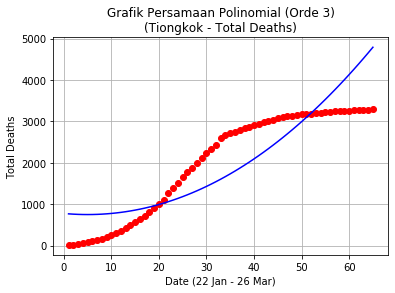

In [89]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Tiongkok - Total Deaths)')
plt.xlabel('Date (22 Jan - 26 Mar)')
plt.ylabel('Total Deaths')

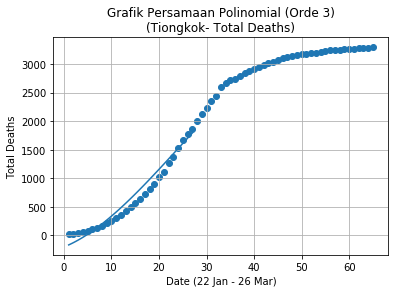

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Tiongkok - Total Deaths) adalah:
R = 0.9938 dan R^2 = 0.9875


In [90]:
#karena hasil yang didapat jauh sekali dari hasil sebenarnya, terpaksa saya menggunakan fungsi yang sudah ada di scikit-learn sebagai pembetulannya

model2 = np.poly1d(np.polyfit(x, y, 3))

line2 = np.linspace(1, 27, 65)

plt.scatter(x, y)
plt.plot(line2, model2(line2))
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Tiongkok- Total Deaths)')
plt.xlabel('Date (22 Jan - 26 Mar)')
plt.ylabel('Total Deaths')
plt.show()

import sklearn
from sklearn.metrics import r2_score
r = np.sqrt(r2_score(y, model2(x)))
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Tiongkok - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_chi_dth_3 = r**2
yreg_chi_dth = model2(line2)

**Menentukan Kurva Regresi yang Paling Mewakili Data di Tiongkok**

1. Data *Active Cases* - Pertumbuhan

In [91]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_chi_up_1))
print("Eksponensial      : {:.4f}".format(R2_chi_up_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_chi_up_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9789
Eksponensial      : 0.8889
Polinomial Orde 3 : 0.9890


2. Data *Active Cases* - Penurunan

In [92]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_chi_down_1))
print("Eksponensial      : {:.4f}".format(R2_chi_down_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_chi_down_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.7321
Eksponensial      : 0.9822
Polinomial Orde 3 : 0.9947


3. Data *Total Deaths*

In [93]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_chi_dth_1))
print("Eksponensial      : {:.4f}".format(R2_chi_dth_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_chi_dth_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9668
Eksponensial      : 0.7210
Polinomial Orde 3 : 0.9875


Jadi, data kenaikan dan penurunan *active cases* serta data *total deaths* di Tiongkok paling dapat diwakilkan dengan regresi polinomial orde 3.

# E.2. Korea Selatan

## E.2.a. Korea Selatan (Data *Active Cases*)

**1. Regresi Berpangkat**

1.a. Kurva Pertumbuhan

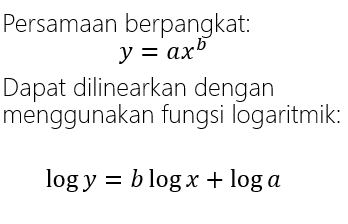
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* (Pertumbuhan) di Korea Selatan, dan x adalah tanggalnya.

In [94]:
y = kor_act_up
x = date_kor_up

In [95]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
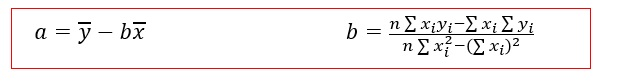

In [96]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [97]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

2.4909327586086443

In [98]:
A = p.mean()-B*q.mean()
A

0.41188270916549685

In [99]:
a = 10**A # A=log(a)
b = B

In [100]:
print("Persamaan Berpangkat (Korea Selatan - Active Cases - Pertumbuhan):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Korea Selatan - Active Cases - Pertumbuhan):
y = (2.5816)x^(2.4909)


menghitung koefisien korelasi menggunakan rumus berikut:
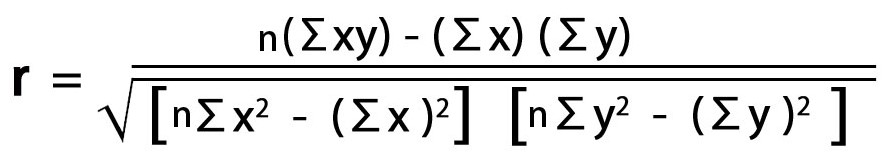

In [101]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Korea Selatan - Active Cases - Pertumbuhan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_kor_up_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Korea Selatan - Active Cases - Pertumbuhan) adalah:
R = 0.9563 dan R^2 = 0.9145


visualisasi grafik persamaan berpangkat (Korea Selatan - *Active Cases* - Pertumbuhan)

In [102]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

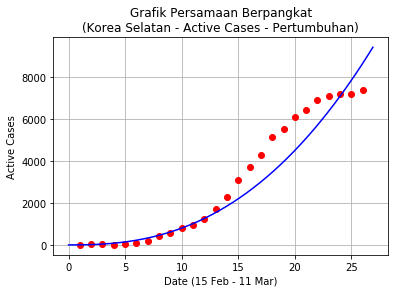

In [103]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Korea Selatan - Active Cases - Pertumbuhan)')
plt.xlabel('Date (15 Feb - 11 Mar)')
plt.ylabel('Active Cases')

1.b. Kurva Penurunan

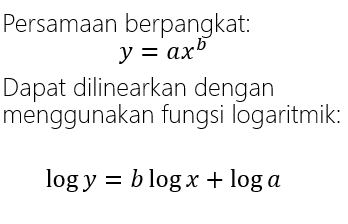
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* (penurunan) di Korea Selatan, dan x adalah tanggalnya.

In [104]:
y = kor_act_down
x = date_kor_down

In [105]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
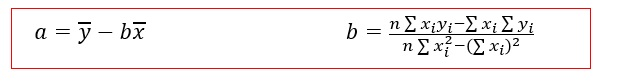

In [106]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [107]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

-0.1351451616131286

In [108]:
A = p.mean()-B*q.mean()
A

3.9183483932968977

In [109]:
a = 10**A # A=log(a)
b = B

In [110]:
print("Persamaan Berpangkat (Korea Selatan - Active Cases - Penurunan):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Korea Selatan - Active Cases - Penurunan):
y = (8286.0661)x^(-0.1351)


menghitung koefisien korelasi menggunakan rumus berikut:
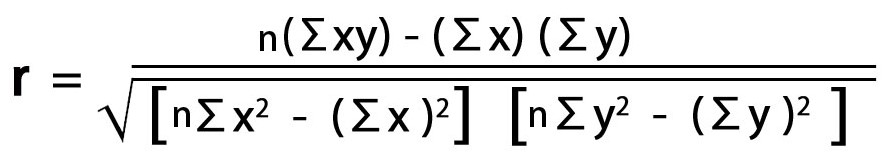

In [111]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Korea Selatan - Active Cases - Penurunan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_kor_down_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Korea Selatan - Active Cases - Penurunan) adalah:
R = -0.8268 dan R^2 = 0.6835


visualisasi grafik persamaan berpangkat (Korea Selatan - *Active Cases* - Penurunan)

In [112]:
xreg = np.array(range(1,int(x[-1]+1)))
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

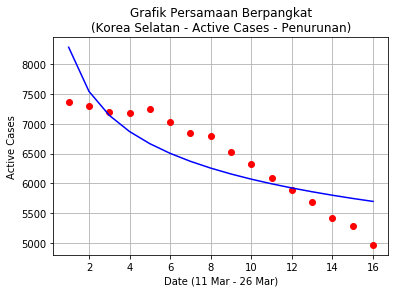

In [113]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Korea Selatan - Active Cases - Penurunan)')
plt.xlabel('Date (11 Mar - 26 Mar)')
plt.ylabel('Active Cases')

**2. Regresi Eksponensial**

2.a. Kurva Pertumbuhan

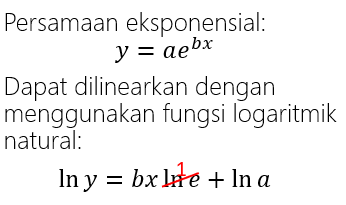
persamaan berikut dapat ditulis menjadi:
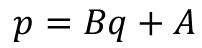

In [114]:
y = kor_act_up
x = date_kor_up

In [115]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
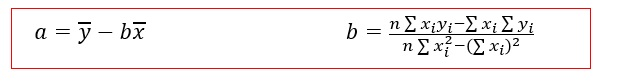

In [116]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [117]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.26840639892252155

In [118]:
A = p.mean()-B*q.mean()
A

3.194092437832156

In [119]:
a = np.e**A # A=log(a)
b = B

In [120]:
print("Persamaan Eksponensial (Korea Selatan - Active Cases - Pertumbuhan):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Korea Selatan - Active Cases - Pertumbuhan):
y = (24.3880)x^(0.2684)


menghitung koefisien korelasi menggunakan rumus berikut:
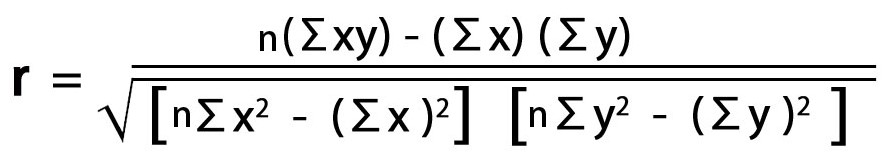

In [121]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Korea Selatan - Active Cases - Pertumbuhan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_kor_up_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Korea Selatan - Active Cases - Pertumbuhan) adalah:
R = 0.9407 dan R^2 = 0.8849


visualisasi grafik persamaan eksponensial (Korea Selatan - *Active Cases* - Pertumbuhan)

In [122]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Active Cases')

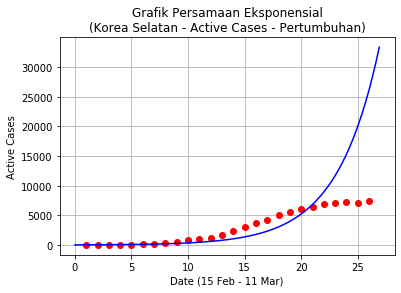

In [123]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Korea Selatan - Active Cases - Pertumbuhan)')
plt.xlabel('Date (15 Feb - 11 Mar)')
plt.ylabel('Active Cases')

2.b. Kurva Penurunan

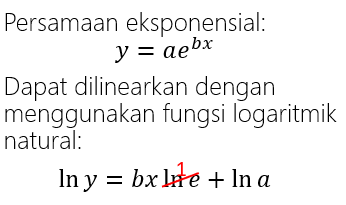
persamaan berikut dapat ditulis menjadi:
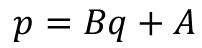

In [124]:
y = kor_act_down
x = date_kor_down

In [125]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
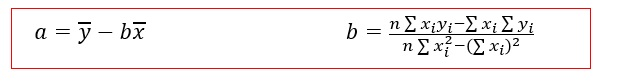

In [126]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [127]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

-0.02617813523870141

In [128]:
A = p.mean()-B*q.mean()
A

8.985772655903348

In [129]:
a = np.e**A # A=log(a)
b = B

In [130]:
print("Persamaan Eksponensial (Korea Selatan - Active Cases - Penurunan):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Korea Selatan - Active Cases - Penurunan):
y = (7988.6148)x^(-0.0262)


menghitung koefisien korelasi menggunakan rumus berikut:
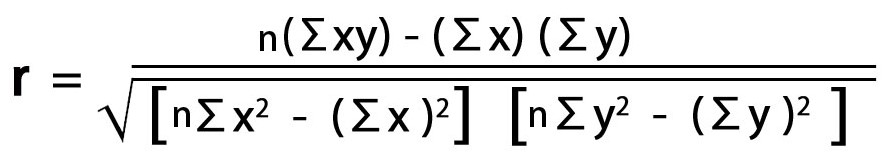

In [131]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Korea Selatan - Active Cases - Penurunan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_kor_down_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Korea Selatan - Active Cases - Penurunan) adalah:
R = -0.9662 dan R^2 = 0.9335


visualisasi grafik persamaan eksponensial (Korea Selatan - *Active Cases* - Penurunan)

In [132]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Active Cases')

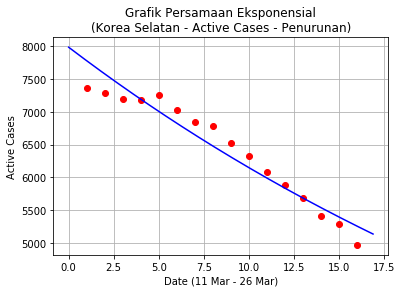

In [133]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Korea Selatan - Active Cases - Penurunan)')
plt.xlabel('Date (11 Mar - 26 Mar)')
plt.ylabel('Active Cases')

**3. Regresi Polinomial (Orde-3)**

3.a. Kurva Pertumbuhan

In [134]:
y = kor_act_up
x = date_kor_up

In [135]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[2.6000000e+01, 3.5100000e+02, 6.2010000e+03, 1.2320100e+05],
       [3.5100000e+02, 6.2010000e+03, 1.2320100e+05, 2.6106210e+06],
       [6.2010000e+03, 1.2320100e+05, 2.6106210e+06, 5.7617001e+07],
       [1.2320100e+05, 2.6106210e+06, 5.7617001e+07, 1.3077971e+09]])

In [136]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[7.82840000e+04, 1.58764900e+06, 3.36666950e+07, 7.37570839e+08]])

In [137]:
A = np.array([[2.6000000e+01, 3.5100000e+02, 6.2010000e+03, 1.2320100e+05],
       [3.5100000e+02, 6.2010000e+03, 1.2320100e+05, 2.6106210e+06],
       [6.2010000e+03, 1.2320100e+05, 2.6106210e+06, 5.7617001e+07],
       [1.2320100e+05, 2.6106210e+06, 5.7617001e+07, 1.3077971e+09]], dtype = 'float')
b = np.array([7.82840000e+04, 1.58764900e+06, 3.36666950e+07, 7.37570839e+08], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 999.44137629, -565.87609352,   69.67220781,   -1.47008813])

In [138]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [139]:
print("Persaman Regresi Polinomial (Orde 3) (Korea Selatan - Active Cases - Pertumbuhan)")
print("y = ({:.4f})x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Korea Selatan - Active Cases - Pertumbuhan)
y = (-1.4701)x^3 + 69.6722x^2 + (-565.8761)x + 999.4414


In [140]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_kor_act_up = yreg
yreg_kor_act_up

array([ 501.76740245,  134.61731545, -110.82941347, -243.3933131 ,
       -271.89491221, -205.15473956,  -51.99332395,  178.76880587,
        478.31112111,  837.81309301, 1248.45419278, 1701.41389166,
       2187.87166086, 2699.00697162, 3225.99929516, 3760.0281027 ,
       4292.27286548, 4813.91305471, 5316.12814163, 5790.09759745,
       6227.00089341, 6618.01750073, 6954.32689064, 7227.10853435,
       7427.54190311, 7546.80646813])

In [141]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_kor_act_up))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Korea Selatan - Active Cases - Pertumbuhan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_kor_up_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Korea Selatan - Active Cases - Pertumbuhan) adalah:
R = 0.9956 dan R^2 = 0.9913


Text(0, 0.5, 'Active Cases')

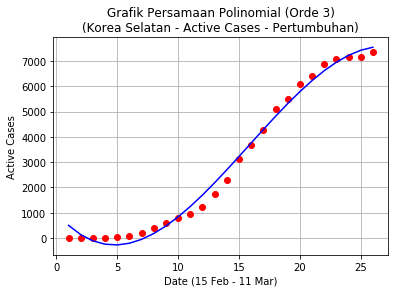

In [142]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_kor_act_up,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Korea Selatan - Active Cases - Pertumbuhan)')
plt.xlabel('Date (15 Feb - 11 Mar)')
plt.ylabel('Active Cases')

3.b. Kurva Penurunan

In [143]:
y = kor_act_down
x = date_kor_down

In [144]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[1.6000000e+01, 1.3600000e+02, 1.4960000e+03, 1.8496000e+04],
       [1.3600000e+02, 1.4960000e+03, 1.8496000e+04, 2.4384800e+05],
       [1.4960000e+03, 1.8496000e+04, 2.4384800e+05, 3.3477760e+06],
       [1.8496000e+04, 2.4384800e+05, 3.3477760e+06, 4.7260136e+07]])

In [145]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[1.03099000e+05, 8.20688000e+05, 8.64518800e+06, 1.03811552e+08]])

In [146]:
A = np.array([[1.6000000e+01, 1.3600000e+02, 1.4960000e+03, 1.8496000e+04],
       [1.3600000e+02, 1.4960000e+03, 1.8496000e+04, 2.4384800e+05],
       [1.4960000e+03, 1.8496000e+04, 2.4384800e+05, 3.3477760e+06],
       [1.8496000e+04, 2.4384800e+05, 3.3477760e+06, 4.7260136e+07]], dtype = 'float')
b = np.array([1.03099000e+05, 8.20688000e+05, 8.64518800e+06, 1.03811552e+08], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 7.25708516e+03,  6.98373899e+01, -2.12267178e+01,  4.99725464e-01])

In [147]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [148]:
print("Persaman Regresi Polinomial (Orde 3) (Korea Selatan - Active Cases - Penurunan)")
print("y = ({:.4f})x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Korea Selatan - Active Cases - Penurunan)
y = (0.4997)x^3 + -21.2267x^2 + (69.8374)x + 7257.0852


In [149]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_kor_act_down = yreg
yreg_kor_act_down

array([7306.19556244, 7315.85087719, 7289.04946189, 7228.78966931,
       7138.06985223, 7019.88836344, 6877.24355572, 6713.13378185,
       6530.55739462, 6332.5127468 , 6121.99819118, 5902.01208054,
       5675.55276767, 5445.61860534, 5215.20794634, 4987.31914345])

In [150]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_kor_act_down))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Korea Selatan - Active Cases - Penurunan) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_kor_down_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Korea Selatan - Active Cases - Penurunan) adalah:
R = 0.9978 dan R^2 = 0.9955


Text(0, 0.5, 'Active Cases')

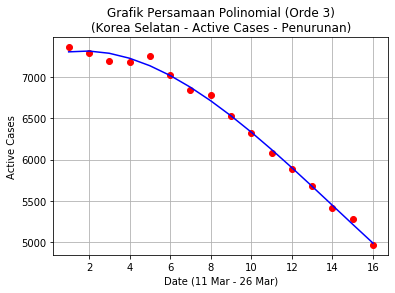

In [151]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_kor_act_down,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Korea Selatan - Active Cases - Penurunan)')
plt.xlabel('Date (11 Mar - 26 Mar)')
plt.ylabel('Active Cases')

## E.2.b. Korea Selatan (Data *Total Deaths*)

**1. Regresi Berpangkat**

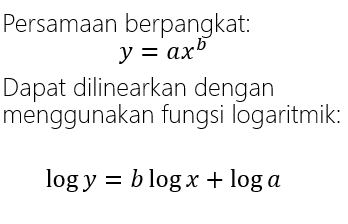
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Total Deaths* di Korea Selatan, dan x adalah tanggalnya.

In [152]:
y = kor_dth
x = date_kor_dth

In [153]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
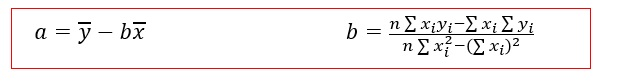

In [154]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [155]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

1.4363487465045701

In [156]:
A = p.mean()-B*q.mean()
A

-0.12876414002550907

In [157]:
a = 10**A #A=log(a)
b = B

In [158]:
print("Persamaan Berpangkat (Korea Selatan - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Korea Selatan - Total Deaths):
y = (0.7434)x^(1.4363)


menghitung koefisien korelasi menggunakan rumus berikut:
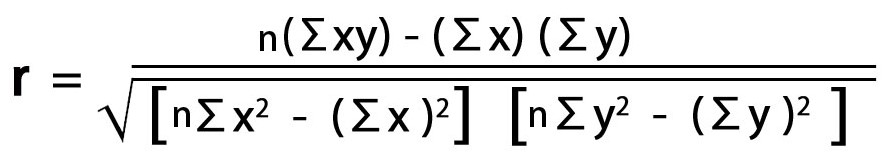

In [159]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Korea Sealtan - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_kor_dth_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Korea Sealtan - Total Deaths) adalah:
R = 0.9944 dan R^2 = 0.9889


visualisasi grafik persamaan berpangkat (Korea Selatan - *Total Deaths*)

In [160]:
xreg = np.array(range(0,int(x[-1]+1)*10))
xreg = xreg/10 #bertujuan untuk memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Total Deaths')

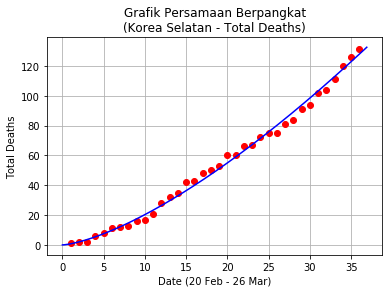

In [161]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Korea Selatan - Total Deaths)')
plt.xlabel('Date (20 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**2. Regresi Eksponensial**

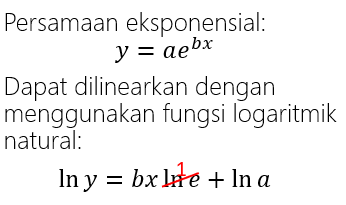
persamaan berikut dapat ditulis menjadi:
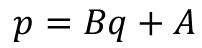

In [162]:
y = kor_dth
x = date_kor_dth

In [163]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
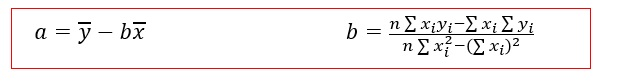

In [164]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [165]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.10840478269760374

In [166]:
A = p.mean()-B*q.mean()
A

1.5171006660762774

In [167]:
a = np.e**A # A=log(a)
b = B

In [168]:
print("Persamaan Eksponensial (Korea Selatan - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Korea Selatan - Total Deaths):
y = (4.5590)x^(0.1084)


menghitung koefisien korelasi menggunakan rumus berikut:
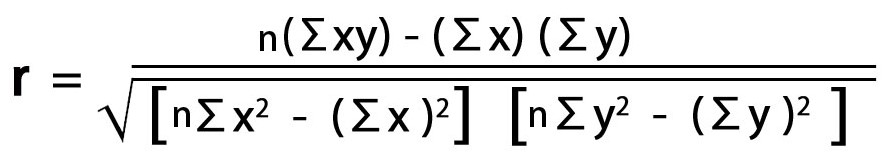

In [169]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Korea Selatan - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_kor_dth_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Korea Selatan - Total Deaths) adalah:
R = 0.9138 dan R^2 = 0.8350


visualisasi grafik persamaan eksponensial (Korea Selatan - *Total Deaths*)

In [170]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Total Deaths')

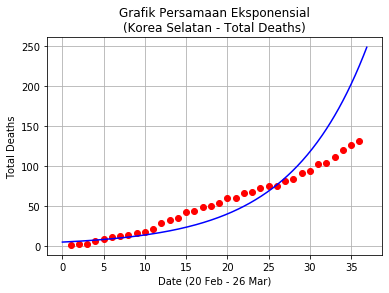

In [171]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Korea Selatan - Total Deaths)')
plt.xlabel('Date (20 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**3. Regresi Polinomial (Orde 3)**

In [172]:
y = kor_dth
x = date_kor_dth

membuat matriks A dan B

In [173]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[ 3.60000000e+01,  6.66000000e+02,  1.62060000e+04,
         4.43556000e+05],
       [ 6.66000000e+02,  1.62060000e+04,  4.43556000e+05,
         1.29485940e+07],
       [ 1.62060000e+04,  4.43556000e+05,  1.29485940e+07,
         3.93729876e+08],
       [ 4.43556000e+05,  1.29485940e+07,  3.93729876e+08,
        -5.71404822e+08]])

In [174]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[1.9590000e+03, 5.0520000e+04, 1.4248120e+06, 4.2395712e+07]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [175]:
A = np.array([[ 3.60000000e+01,  6.66000000e+02,  1.62060000e+04,
         4.43556000e+05],
       [ 6.66000000e+02,  1.62060000e+04,  4.43556000e+05,
         1.29485940e+07],
       [ 1.62060000e+04,  4.43556000e+05,  1.29485940e+07,
         3.93729876e+08],
       [ 4.43556000e+05,  1.29485940e+07,  3.93729876e+08,
        -5.71404822e+08]], dtype = 'float')
b = np.array([1.9590000e+03, 5.0520000e+04, 1.4248120e+06, 4.2395712e+07], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([-3.32705285e+00,  2.05651774e+00,  4.37907765e-02, -1.21796972e-06])

In [176]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [177]:
print("Persaman Regresi Polinomial (Orde 3) (Korea Selatan - Total Deaths)")
print("y = ({:.4f})x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Korea Selatan - Total Deaths)
y = (-0.0000)x^3 + 0.0438x^2 + (2.0565)x + -3.3271


In [178]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_kor_dth = yreg
yreg_kor_dth

array([ -1.22674555,   0.961136  ,   3.23658448,   5.59959259,
         8.05015303,  10.58825848,  13.21390163,  15.92707519,
        18.72777183,  21.61598426,  24.59170516,  27.65492722,
        30.80564315,  34.04384563,  37.36952735,  40.78268101,
        44.28329929,  47.8713749 ,  51.54690052,  55.30986884,
        59.16027256,  63.09810437,  67.12335696,  71.23602302,
        75.43609524,  79.72356633,  84.09842896,  88.56067584,
        93.11029965,  97.74729309, 102.47164884, 107.28335961,
       112.18241808, 117.16881694, 122.24254889, 127.40360662])

menghitung koefisien korelasi

In [179]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_kor_dth))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Korea Selatan - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_kor_dth_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Korea Selatan - Total Deaths) adalah:
R = 0.9976 dan R^2 = 0.9951


Text(0, 0.5, 'Total Deaths')

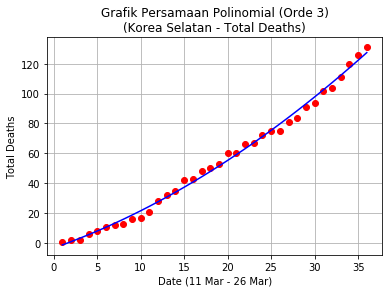

In [180]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_kor_dth,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Korea Selatan - Total Deaths)')
plt.xlabel('Date (11 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**Menentukan Kurva Regresi yang Paling Mewakili Data di Korea Selatan**

1. Data *Active Cases* - Pertumbuhan

In [181]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_kor_up_1))
print("Eksponensial      : {:.4f}".format(R2_kor_up_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_kor_up_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9145
Eksponensial      : 0.8849
Polinomial Orde 3 : 0.9913


2. Data *Active Cases* - Penurunan

In [182]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_kor_down_1))
print("Eksponensial      : {:.4f}".format(R2_kor_down_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_kor_down_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.6835
Eksponensial      : 0.9335
Polinomial Orde 3 : 0.9955


3. Data *Total Deaths*

In [183]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_kor_dth_1))
print("Eksponensial      : {:.4f}".format(R2_kor_dth_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_kor_dth_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9889
Eksponensial      : 0.8350
Polinomial Orde 3 : 0.9951


Jadi, data kenaikan dan penurunan *active cases* serta data *total deaths* di Korea Selatan paling dapat diwakilkan dengan regresi polinomial orde 3.

# E.3. Italia

## E.3.a. Italia (Data *Active Cases*)

**1. Regresi Berpangkat**

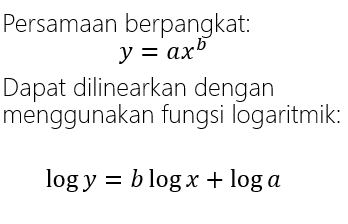
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* di Italia, dan x adalah tanggalnya.

In [184]:
y = ita_act
x = date_ita_act

In [185]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
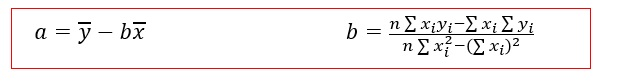

In [186]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [187]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

3.5971193027124744

In [188]:
A = p.mean()-B*q.mean()
A

-1.132294044743686

In [189]:
a = 10**A # A=log(a)
b = B

In [190]:
print("Persamaan Berpangkat (Italia - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Italia - Active Cases):
y = (0.0737)x^(3.5971)


menghitung koefisien korelasi menggunakan rumus berikut:
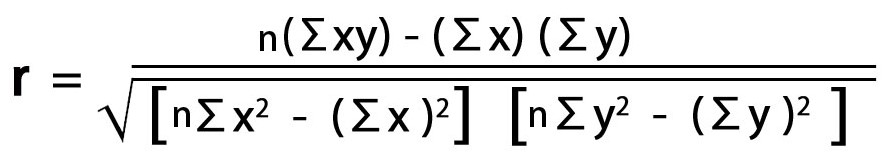

In [191]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Italia - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ita_act_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Italia - Active Cases) adalah:
R = 0.9624 dan R^2 = 0.9262


visualisasi grafik persamaan berpangkat (Italia - *Active Cases*)

In [192]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

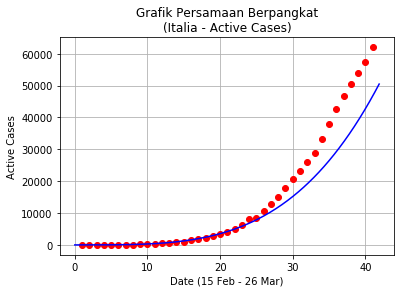

In [193]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Italia - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**2. Regresi Eksponensial**

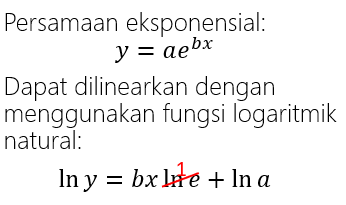
persamaan berikut dapat ditulis menjadi:
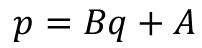

In [194]:
y = ita_act
x = date_ita_act

In [195]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
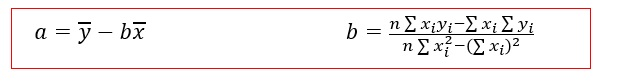

In [196]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [197]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.25851638677560296

In [198]:
A = p.mean()-B*q.mean()
A

1.9687004008312554

In [199]:
a = np.e**A # A=log(a)
b = B

In [200]:
print("Persamaan Eksponensial (Italia - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Italia - Active Cases):
y = (7.1614)x^(0.2585)


menghitung koefisien korelasi menggunakan rumus berikut:
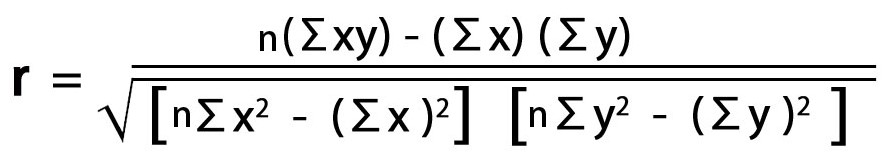

In [201]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Italia - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ita_act_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Italia - Active Cases) adalah:
R = 0.9466 dan R^2 = 0.8961


visualisasi grafik persamaan eksponensial (Italia - *Active Cases*)

In [202]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Active Cases')

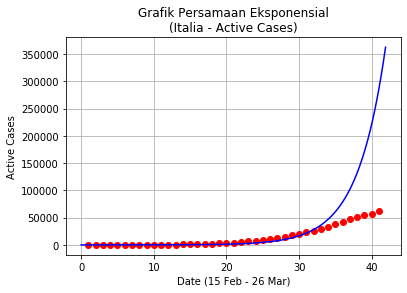

In [203]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Italia - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**3. Regresi Polinomial (Orde 3)**

In [204]:
y = ita_act
x = date_ita_act

membuat matriks A dan B

In [205]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 1.90236789e+08]])

In [206]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[5.86188000e+05, 2.02600250e+07, 7.19087439e+08, 2.61502307e+08]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [207]:
A = np.array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 1.90236789e+08]], dtype = 'float')
b = np.array([5.86188000e+05, 2.02600250e+07, 7.19087439e+08, 2.61502307e+08], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 2.73527426e+03, -6.17902488e+02,  1.56040775e+01,  8.55703626e-01])

In [208]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [209]:
print("Persaman Regresi Polinomial (Orde 3) (Italia - Active Cases)")
print("y = ({:.4f})x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Italia - Active Cases)
y = (0.8557)x^3 + 15.6041x^2 + (-617.9025)x + 2735.2743


In [210]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_ita_act = yreg
yreg_ita_act

array([ 2133.83155664,  1568.73122667,  1045.10749516,   568.09458386,
         142.82671453,  -225.56189108,  -531.9370112 ,  -771.1644241 ,
        -938.109908  , -1027.63924115, -1034.6182018 ,  -953.91256819,
        -780.38811857,  -508.91063118,  -134.34588426,   348.44034394,
         944.58227517,  1659.2141312 ,  2497.47013378,  3464.48450466,
        4565.3914656 ,  5805.32523835,  7189.42004468,  8722.81010633,
       10410.62964507, 12258.01288264, 14270.09404081, 16452.00734133,
       18808.88700596, 21345.86725644, 24068.08231454, 26980.66640202,
       30088.75374062, 33397.47855211, 36911.97505824, 40637.37748076,
       44578.82004144, 48741.43696202, 53130.36246427, 57750.73076993,
       62607.67610077])

menghitung koefisien korelasi

In [211]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_ita_act))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Italia - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ita_act_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Italia - Active Cases) adalah:
R = 0.9981 dan R^2 = 0.9961


visualisasi persamaan polinomial

Text(0, 0.5, 'Active Cases')

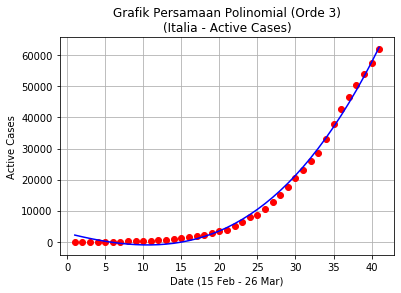

In [212]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_ita_act,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Italia - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

## E.3.b. Italia (Data *Total Deaths*)

**1. Regresi Berpangkat**

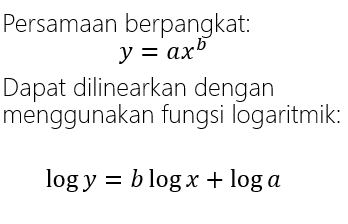
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Total Deaths* di Italia, dan x adalah tanggalnya.

In [213]:
y = ita_dth
x = date_ita_dth

In [214]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
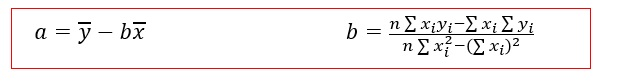

In [215]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [216]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

2.9685397472827875

In [217]:
A = p.mean()-B*q.mean()
A

-0.951191151262412

In [218]:
a = 10**A # A=log(a)
b = B

In [219]:
print("Persamaan Berpangkat (Italia - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Italia - Total Deaths):
y = (0.1119)x^(2.9685)


menghitung koefisien korelasi menggunakan rumus berikut:
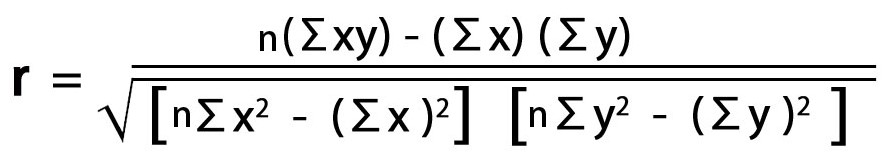

In [220]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Italia - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ita_dth_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Italia - Total Deaths) adalah:
R = 0.9662 dan R^2 = 0.9336


visualisasi grafik persamaan berpangkat (Italia - *Total Deaths*)

In [221]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Total Deaths')

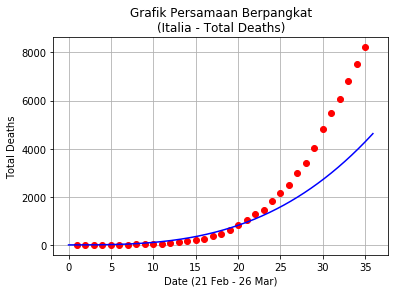

In [222]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Italia - Total Deaths)')
plt.xlabel('Date (21 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**2. Regresi Eksponensial**

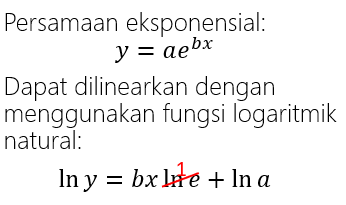
persamaan berikut dapat ditulis menjadi:
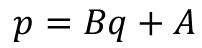

In [223]:
y = ita_dth
x = date_ita_dth

In [224]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
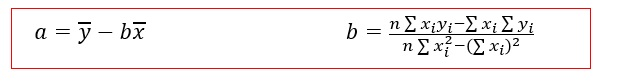

In [225]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [226]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.2544375171099478

In [227]:
A = p.mean()-B*q.mean()
A

1.0444946820268877

In [228]:
a = np.e**A # A=log(a)
b = B

In [229]:
print("Persamaan Eksponensial (Italia - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Italia - Total Deaths):
y = (2.8420)x^(0.2544)


menghitung koefisien korelasi menggunakan rumus berikut:
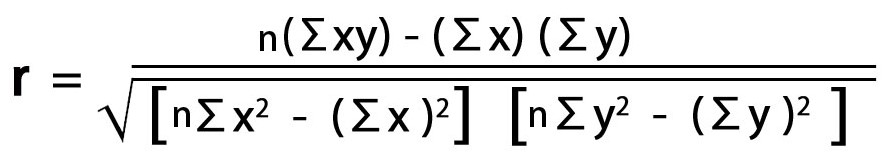

In [230]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Italia - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ita_dth_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Italia - Total Deaths) adalah:
R = 0.9832 dan R^2 = 0.9667


visualisasi grafik persamaan eksponensial (Italia - *Total Deaths*)

In [231]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Total Deaths')

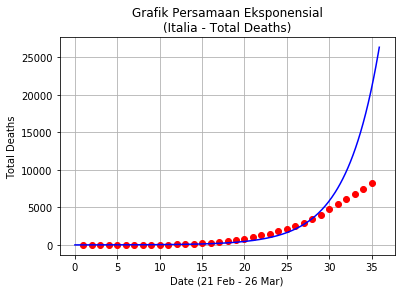

In [232]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Italia - Total Deaths)')
plt.xlabel('Date (21 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**3. Regresi Polinomial (Orde 3)**

In [233]:
y = ita_dth
x = date_ita_dth

membuat matriks A dan B

In [234]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[3.50000000e+01, 6.30000000e+02, 1.49100000e+04, 3.96900000e+05],
       [6.30000000e+02, 1.49100000e+04, 3.96900000e+05, 1.12689780e+07],
       [1.49100000e+04, 3.96900000e+05, 1.12689780e+07, 3.33263700e+08],
       [3.96900000e+05, 1.12689780e+07, 3.33263700e+08, 1.54678014e+09]])

In [235]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[6.27710000e+04, 1.86998400e+06, 5.71214420e+07, 1.77758009e+09]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [236]:
A = np.array([[3.50000000e+01, 6.30000000e+02, 1.49100000e+04, 3.96900000e+05],
       [6.30000000e+02, 1.49100000e+04, 3.96900000e+05, 1.12689780e+07],
       [1.49100000e+04, 3.96900000e+05, 1.12689780e+07, 3.33263700e+08],
       [3.96900000e+05, 1.12689780e+07, 3.33263700e+08, 1.54678014e+09]], dtype = 'float')
b = np.array([6.27710000e+04, 1.86998400e+06, 5.71214420e+07, 1.77758009e+09], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 9.19427444e+02, -2.56471368e+02,  1.29159699e+01, -1.03076138e-03])

In [237]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [238]:
print("Persaman Regresi Polinomial (Orde 3) (Italia - Total Deaths)")
print("y = ({:.4f})x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Italia - Total Deaths)
y = (-0.0010)x^3 + 12.9160x^2 + (-256.4714)x + 919.4274


In [239]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_ita_dth = yreg
yreg_ita_dth

array([ 675.87101485,  458.14034098,  266.22923768,  100.13152039,
        -40.15899546, -154.64849444, -243.34316111, -306.24918004,
       -343.37273581, -354.72001297, -340.29719611, -300.11046978,
       -234.16601855, -142.470027  ,  -25.02867969,  118.15183881,
        287.06534393,  481.70565111,  702.06657577,  948.14193334,
       1219.92553927, 1517.41120898, 1840.5927579 , 2189.46400146,
       2564.0187551 , 2964.25083424, 3390.15405433, 3841.72223078,
       4318.94917904, 4821.82871453, 5350.35465269, 5904.52080895,
       6484.32099873, 7089.74903748, 7720.79874062])

menghitung koefisien korelasi

In [240]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_ita_dth))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Italia - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ita_dth_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Italia - Total Deaths) adalah:
R = 0.9911 dan R^2 = 0.9823


visualisasi persamaan polinomial

Text(0, 0.5, 'Total Deaths')

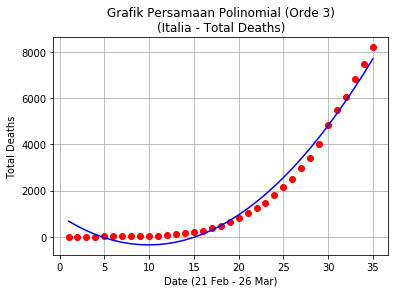

In [241]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_ita_dth,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Italia - Total Deaths)')
plt.xlabel('Date (21 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**Menentukan Kurva Regresi yang Paling Mewakili Data di Italia**

1. Data *Active Cases*

In [242]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_ita_act_1))
print("Eksponensial      : {:.4f}".format(R2_ita_act_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_ita_act_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9262
Eksponensial      : 0.8961
Polinomial Orde 3 : 0.9961


2. Data *Total Deaths*

In [243]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_ita_dth_1))
print("Eksponensial      : {:.4f}".format(R2_ita_dth_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_ita_dth_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9336
Eksponensial      : 0.9667
Polinomial Orde 3 : 0.9823


Jadi, data *active cases* dan data *total deaths* di Italia paling dapat diwakilkan dengan regresi polinomial orde 3.

# E.4. Iran

## E.4.a. Iran (Data *Active Cases*)

**1. Regresi Berpangkat**

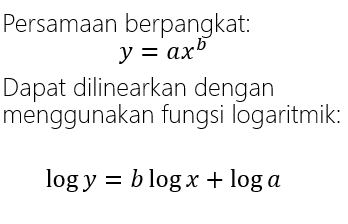
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* di Iran, dan x adalah tanggalnya.

In [244]:
y = iran_act
x = date_iran_act

In [245]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
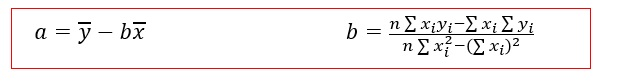

In [246]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [247]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

2.7118348777449257

In [248]:
A = p.mean()-B*q.mean()
A

0.07551238891672085

In [249]:
a = 10**A # A=log(a)
b = B

In [250]:
print("Persamaan Berpangkat (Iran - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Iran - Active Cases):
y = (1.1899)x^(2.7118)


menghitung koefisien korelasi menggunakan rumus berikut:
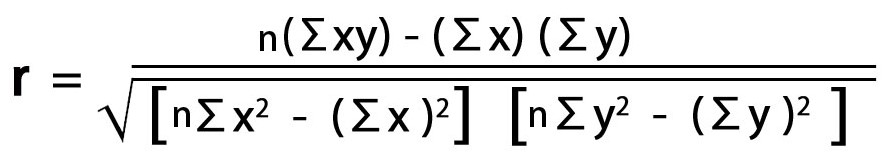

In [251]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Iran - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_iran_act_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Iran - Active Cases) adalah:
R = 0.9843 dan R^2 = 0.9688


visualisasi grafik persamaan berpangkat (Iran - *Active Cases*)

In [252]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

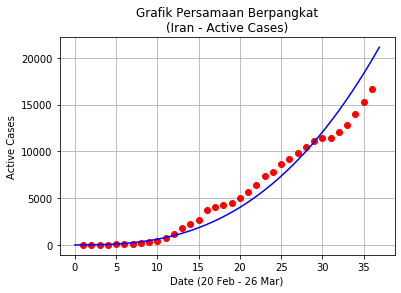

In [253]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Iran - Active Cases)')
plt.xlabel('Date (20 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**2. Regresi Eksponensial**

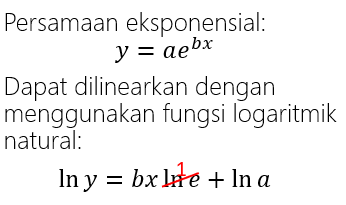
persamaan berikut dapat ditulis menjadi:
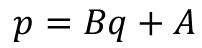

In [254]:
y = iran_act
x = date_iran_act

In [255]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
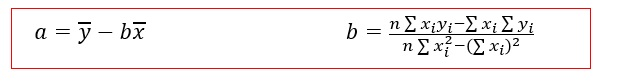

In [256]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [257]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.20692345626286326

In [258]:
A = p.mean()-B*q.mean()
A

3.5562343753728887

In [259]:
a = np.e**A # A=log(a)
b = B

In [260]:
print("Persamaan Eksponensial (Iran - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Iran - Active Cases):
y = (35.0310)x^(0.2069)


menghitung koefisien korelasi menggunakan rumus berikut:
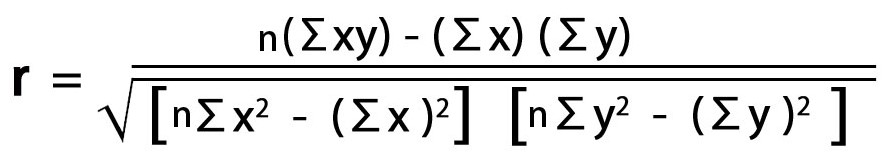

In [261]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Iran - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_iran_act_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Iran - Active Cases) adalah:
R = 0.9144 dan R^2 = 0.8362


visualisasi grafik persamaan eksponensial (Iran - *Active Cases*)

In [262]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Active Cases')

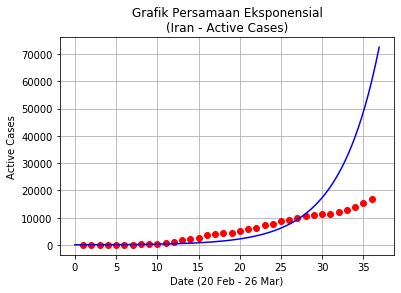

In [263]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Iran - Active Cases)')
plt.xlabel('Date (20 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**3. Regresi Polinomial (Orde 3)**

In [264]:
y = iran_act
x = date_iran_act

membuat matriks A dan B

In [265]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[ 3.60000000e+01,  6.66000000e+02,  1.62060000e+04,
         4.43556000e+05],
       [ 6.66000000e+02,  1.62060000e+04,  4.43556000e+05,
         1.29485940e+07],
       [ 1.62060000e+04,  4.43556000e+05,  1.29485940e+07,
         3.93729876e+08],
       [ 4.43556000e+05,  1.29485940e+07,  3.93729876e+08,
        -5.71404822e+08]])

In [266]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[2.01465000e+05, 5.58755100e+06, 1.63282457e+08, 6.58586441e+08]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [267]:
A = np.array([[ 3.60000000e+01,  6.66000000e+02,  1.62060000e+04,
         4.43556000e+05],
       [ 6.66000000e+02,  1.62060000e+04,  4.43556000e+05,
         1.29485940e+07],
       [ 1.62060000e+04,  4.43556000e+05,  1.29485940e+07,
         3.93729876e+08],
       [ 4.43556000e+05,  1.29485940e+07,  3.93729876e+08,
        -5.71404822e+08]], dtype = 'float')
b = np.array([2.01465000e+05, 5.58755100e+06, 1.63282457e+08, 6.58586441e+08], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([-1.55247474e+03,  3.42601883e+02, -7.35979911e+00,  3.34690864e-01])

In [268]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [269]:
print("Persaman Regresi Polinomial (Orde 3) (Iran - Active Cases)")
print("y = {:.4f}x^3 + ({:.4f})x^2 + {:.4f}x + ({:.4f})".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Iran - Active Cases)
y = 0.3347x^3 + (-7.3598)x^2 + 342.6019x + (-1552.4747)


In [270]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_iran_act = yreg
yreg_iran_act

array([-1216.89796703,  -894.03264494,  -581.87063071,  -278.40377915,
          18.37605492,   310.47701669,   599.90725134,   888.67490405,
        1178.78812   ,  1472.25504437,  1771.08382236,  2077.28259913,
        2392.85951987,  2719.82272976,  3060.18037399,  3415.94059774,
        3789.11154618,  4181.70136451,  4595.71819791,  5033.17019155,
        5496.06549062,  5986.4122403 ,  6506.21858577,  7057.49267222,
        7642.24264483,  8262.47664877,  8920.20282924,  9617.42933142,
       10356.16430048, 11138.41588161, 11966.19221999, 12841.50146081,
       13766.35174924, 14742.75123046, 15772.70804967, 16858.23035204])

menghitung koefisien korelasi

In [271]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_iran_act))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Iran - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_iran_act_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Iran - Active Cases) adalah:
R = 0.9913 dan R^2 = 0.9827


visualisasi persamaan polinomial

Text(0, 0.5, 'Active Cases')

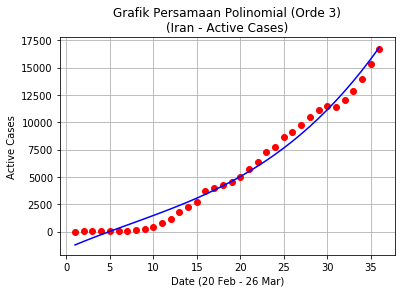

In [272]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_iran_act,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Iran - Active Cases)')
plt.xlabel('Date (20 Feb - 26 Mar)')
plt.ylabel('Active Cases')

## E.4.a. Iran (Data *Total Deaths*)

**1. Regresi Berpangkat**

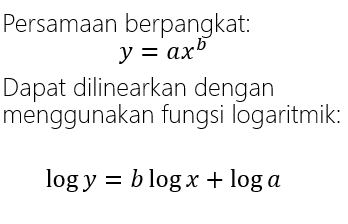
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Total Deaths* di Iran, dan x adalah tanggalnya.

In [273]:
y = iran_dth
x = date_iran_dth

In [274]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
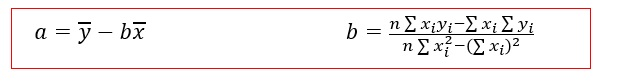

In [275]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [276]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

2.3575901635832457

In [277]:
A = p.mean()-B*q.mean()
A

-0.5796159964413135

In [278]:
a = 10**A # A=log(a)
b = B

In [279]:
print("Persamaan Berpangkat (Iran - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Iran - Total Deaths):
y = (0.2633)x^(2.3576)


menghitung koefisien korelasi menggunakan rumus berikut:
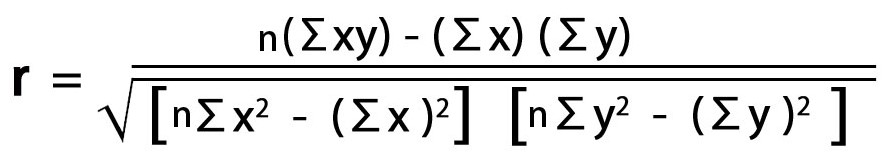

In [280]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Iran - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_iran_dth_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Iran - Total Deaths) adalah:
R = 0.9654 dan R^2 = 0.9320


visualisasi grafik persamaan berpangkat (Iran - *Total Deaths*)

In [281]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Total Deaths')

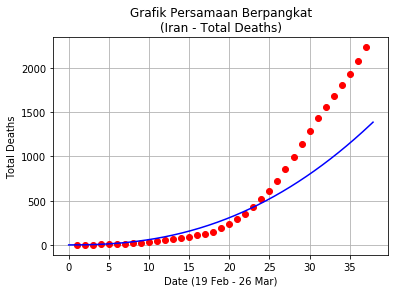

In [282]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Iran - Total Deaths)')
plt.xlabel('Date (19 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**2. Regresi Eksponensial**

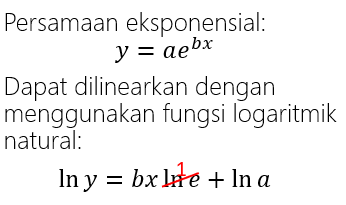
persamaan berikut dapat ditulis menjadi:
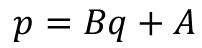

In [283]:
y = iran_dth
x = date_iran_dth

In [284]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
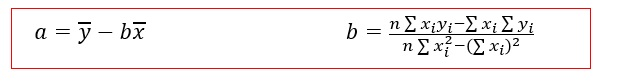

In [285]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [286]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.19258178299475903

In [287]:
A = p.mean()-B*q.mean()
A

1.3355438042520094

In [288]:
a = np.e**A # A=log(a)
b = B

In [289]:
print("Persamaan Eksponensial (Iran - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Iran - Total Deaths):
y = (3.8021)x^(0.1926)


menghitung koefisien korelasi menggunakan rumus berikut:
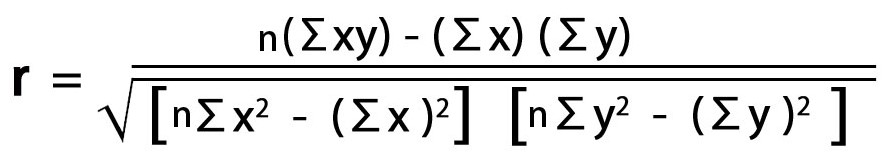

In [290]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Iran - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_iran_dth_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Iran - Total Deaths) adalah:
R = 0.9840 dan R^2 = 0.9682


visualisasi grafik persamaan eksponensial (Iran - *Total Deaths*)

In [291]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Total Deaths')

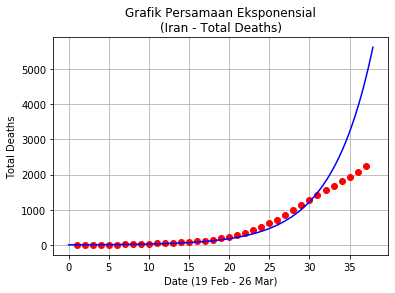

In [292]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Iran - Total Deaths)')
plt.xlabel('Date (19 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**3. Regresi Polinomial (Orde 3)**

In [293]:
y = iran_dth
x = date_iran_dth

membuat matriks A dan B

In [294]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[3.70000000e+01, 7.03000000e+02, 1.75750000e+04, 4.94209000e+05],
       [7.03000000e+02, 1.75750000e+04, 4.94209000e+05, 1.48227550e+07],
       [1.75750000e+04, 4.94209000e+05, 1.48227550e+07, 4.63073833e+08],
       [4.94209000e+05, 1.48227550e+07, 4.63073833e+08, 1.99432159e+09]])

In [295]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[2.11830000e+04, 6.49180000e+05, 2.05634200e+07, 6.66336352e+08]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [296]:
A = np.array([[3.70000000e+01, 7.03000000e+02, 1.75750000e+04, 4.94209000e+05],
       [7.03000000e+02, 1.75750000e+04, 4.94209000e+05, 1.48227550e+07],
       [1.75750000e+04, 4.94209000e+05, 1.48227550e+07, 4.63073833e+08],
       [4.94209000e+05, 1.48227550e+07, 4.63073833e+08, 1.99432159e+09]], dtype = 'float')
b = np.array([2.11830000e+04, 6.49180000e+05, 2.05634200e+07, 6.66336352e+08], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 1.86649398e+02, -5.31599596e+01,  2.94184014e+00, -1.10108332e-04])

In [297]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [298]:
print("Persaman Regresi Polinomial (Orde 3) (Iran - Total Deaths)")
print("y = ({:.4f})x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Iran - Total Deaths)
y = (-0.0001)x^3 + 2.9418x^2 + (-53.1600)x + 186.6494


In [299]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_iran_dth = yreg
yreg_iran_dth

array([ 136.43116882,   92.09595885,   53.64310785,   21.07195517,
         -5.61815983,  -26.42789781,  -41.35791942,  -50.4088853 ,
        -53.58145611,  -50.87629249,  -42.29405511,  -27.83540459,
         -7.50100161,   18.7084932 ,   50.79241919,   88.75011569,
        132.58092208,  182.28417768,  237.85922186,  299.30539396,
        366.62203334,  439.80847934,  518.86407131,  603.78814861,
        694.58005058,  791.23911658,  893.76468594, 1002.15609804,
       1116.4126922 , 1236.53380779, 1362.51878416, 1494.36696065,
       1632.07767661, 1775.65027139, 1925.08408435, 2080.37845484,
       2241.53272219])

menghitung koefisien korelasi

In [300]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_iran_dth))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Iran - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_iran_dth_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Iran - Total Deaths) adalah:
R = 0.9960 dan R^2 = 0.9920


visualisasi persamaan polinomial

Text(0, 0.5, 'Total Deaths')

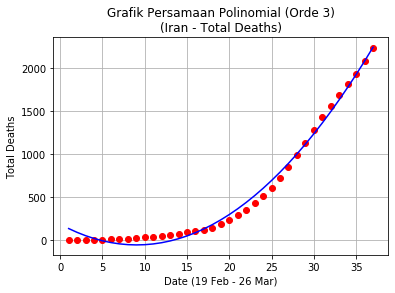

In [301]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_iran_dth,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Iran - Total Deaths)')
plt.xlabel('Date (19 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**Menentukan Kurva Regresi yang Paling Mewakili Data di Iran**

1. Data *Active Cases*

In [302]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_iran_act_1))
print("Eksponensial      : {:.4f}".format(R2_iran_act_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_iran_act_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9688
Eksponensial      : 0.8362
Polinomial Orde 3 : 0.9827


2. Data *Total Deaths*

In [303]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_iran_dth_1))
print("Eksponensial      : {:.4f}".format(R2_iran_dth_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_iran_dth_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9320
Eksponensial      : 0.9682
Polinomial Orde 3 : 0.9920


Jadi, data *active cases* dan data *total deaths* di Iran paling dapat diwakilkan dengan regresi polinomial orde 3.

# E.5. Spanyol

## E.5.a. Spanyol (Data *Active Cases*)

**1. Regresi Berpangkat**

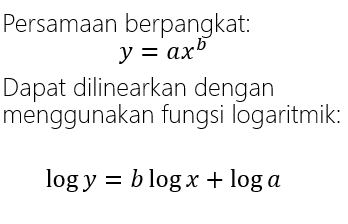
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* di Spanyol, dan x adalah tanggalnya.

In [304]:
y = spa_act
x = date_spa_act

In [305]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
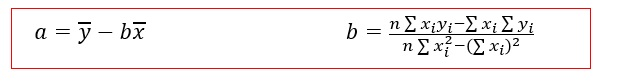

In [306]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [307]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

3.3253739710546544

In [308]:
A = p.mean()-B*q.mean()
A

-0.6354123751378542

In [309]:
a = 10**A # A=log(a)
b = B

In [310]:
print("Persamaan Berpangkat (Spanyol - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Spanyol - Active Cases):
y = (0.2315)x^(3.3254)


menghitung koefisien korelasi menggunakan rumus berikut:
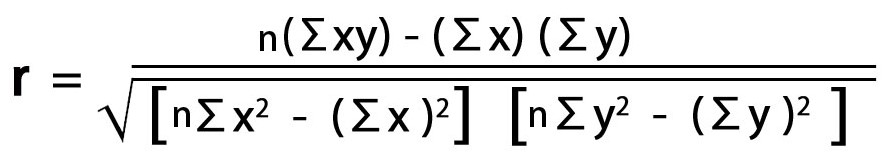

In [311]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Spanyol - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_spa_act_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Spanyol - Active Cases) adalah:
R = 0.9763 dan R^2 = 0.9531


visualisasi grafik persamaan berpangkat (Spanyol - *Active Cases*)

In [312]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

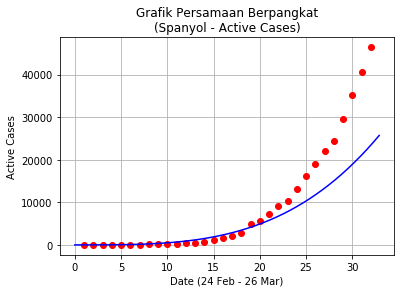

In [313]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Spanyol - Active Cases)')
plt.xlabel('Date (24 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**2. Regresi Eksponensial**

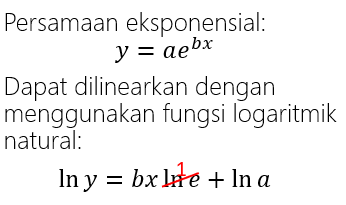
persamaan berikut dapat ditulis menjadi:
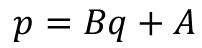

In [314]:
y = spa_act
x = date_spa_act

In [315]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
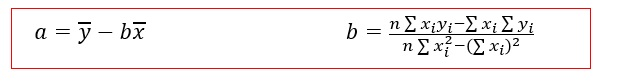

In [316]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [317]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.30383957819593466

In [318]:
A = p.mean()-B*q.mean()
A

1.9988907564862082

In [319]:
a = np.e**A # A=log(a)
b = B

In [320]:
print("Persamaan Eksponensial (Spanyol - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Spanyol - Active Cases):
y = (7.3809)x^(0.3038)


menghitung koefisien korelasi menggunakan rumus berikut:
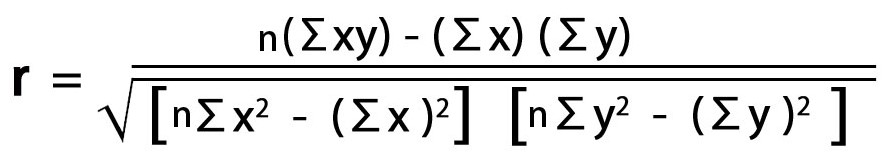

In [321]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Spanyol - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_spa_act_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Spanyol - Active Cases) adalah:
R = 0.9777 dan R^2 = 0.9560


visualisasi grafik persamaan eksponensial (Spanyol - *Active Cases*)

In [322]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Active Cases')

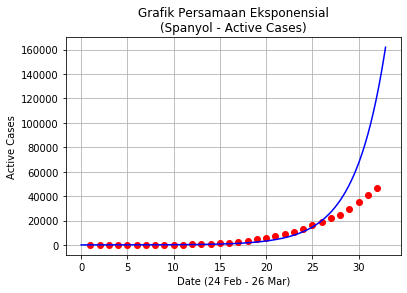

In [323]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Spanyol - Active Cases)')
plt.xlabel('Date (24 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**3. Regresi Polinomial (Orde 3)**

In [324]:
y = spa_act
x = date_spa_act

membuat matriks A dan B

In [325]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[3.20000000e+01, 5.28000000e+02, 1.14400000e+04, 2.78784000e+05],
       [5.28000000e+02, 1.14400000e+04, 2.78784000e+05, 7.24609600e+06],
       [1.14400000e+04, 2.78784000e+05, 7.24609600e+06, 1.96171008e+08],
       [2.78784000e+05, 7.24609600e+06, 1.96171008e+08, 1.16720942e+09]])

In [326]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[ 2.93327000e+05,  8.08864400e+06,  2.28065264e+08,
        -2.04989189e+09]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [327]:
A = np.array([[3.20000000e+01, 5.28000000e+02, 1.14400000e+04, 2.78784000e+05],
       [5.28000000e+02, 1.14400000e+04, 2.78784000e+05, 7.24609600e+06],
       [1.14400000e+04, 2.78784000e+05, 7.24609600e+06, 1.96171008e+08],
       [2.78784000e+05, 7.24609600e+06, 1.96171008e+08, 1.16720942e+09]], dtype = 'float')
b = np.array([ 2.93327000e+05,  8.08864400e+06,  2.28065264e+08,
        -2.04989189e+09], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([1718.92022428, -329.72178408,  -12.58881714,    1.99592058])

In [328]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [329]:
print("Persaman Regresi Polinomial (Orde 3) (Spanyol - Active Cases)")
print("y = {:.4f}x^3 + ({:.4f})x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Spanyol - Active Cases)
y = 1.9959x^3 + (-12.5888)x^2 + (-329.7218)x + 1718.9202


In [330]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_spa_act = yreg
yreg_spa_act

array([ 1.37860554e+03,  1.02508875e+03,  6.70345373e+02,  3.26350931e+02,
        5.08094792e+00, -2.81489052e+02, -5.21383545e+02, -7.02627008e+02,
       -8.13243918e+02, -8.41258751e+02, -7.74695983e+02, -6.01580091e+02,
       -3.09935551e+02,  1.12213159e+02,  6.76841563e+02,  1.39592519e+03,
        2.28143955e+03,  3.34536018e+03,  4.59966260e+03,  6.05632232e+03,
        7.72731489e+03,  9.62461581e+03,  1.17602006e+04,  1.41460448e+04,
        1.67941240e+04,  1.97164136e+04,  2.29248891e+04,  2.64315262e+04,
        3.02483003e+04,  3.43871869e+04,  3.88601616e+04,  4.36791999e+04])

menghitung koefisien korelasi

In [331]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_spa_act))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Spanyol - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_spa_act_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Spanyol - Active Cases) adalah:
R = 0.9970 dan R^2 = 0.9941


visualisasi persamaan polinomial

Text(0, 0.5, 'Active Cases')

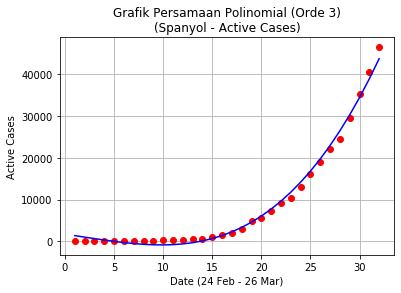

In [332]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_spa_act,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Spanyol - Active Cases)')
plt.xlabel('Date (24 Feb - 26 Mar)')
plt.ylabel('Active Cases')

## E.5.b. Spanyol (Data *Total Deaths*)

**1. Regresi Berpangkat**

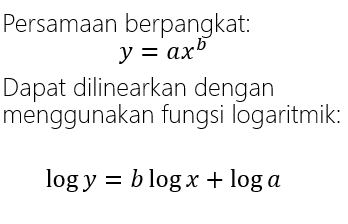
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Total Deaths* di Spanyol, dan x adalah tanggalnya.

In [333]:
y = spa_dth
x = date_spa_dth

In [334]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
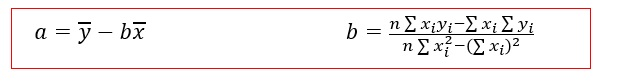

In [335]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [336]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

2.9473074830006802

In [337]:
A = p.mean()-B*q.mean()
A

-0.7569166841356982

In [338]:
a = 10**A # A=log(a)
b = B

In [339]:
print("Persamaan Berpangkat (Spanyol - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Spanyol - Total Deaths):
y = (0.1750)x^(2.9473)


menghitung koefisien korelasi menggunakan rumus berikut:
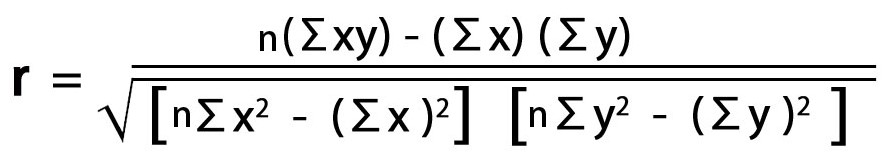

In [340]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Spanyol - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_spa_dth_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Spanyol - Total Deaths) adalah:
R = 0.9700 dan R^2 = 0.9409


visualisasi grafik persamaan berpangkat (Spanyol - *Total Deaths*)

In [341]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Total Deaths')

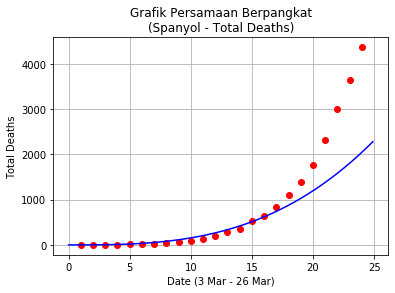

In [342]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Spanyol - Total Deaths)')
plt.xlabel('Date (3 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**2. Regresi Eksponensial**

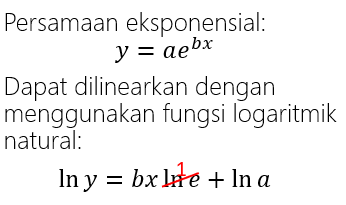
persamaan berikut dapat ditulis menjadi:
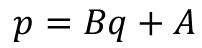

In [343]:
y = spa_dth
x = date_spa_dth

In [344]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
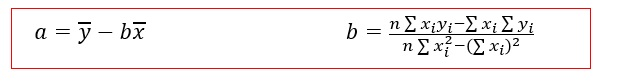

In [345]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [346]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.352220147397951

In [347]:
A = p.mean()-B*q.mean()
A

0.5821932052139296

In [348]:
a = np.e**A # A=log(a)
b = B

In [349]:
print("Persamaan Eksponensial (Spanyol - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Spanyol - Total Deaths):
y = (1.7900)x^(0.3522)


menghitung koefisien korelasi menggunakan rumus berikut:
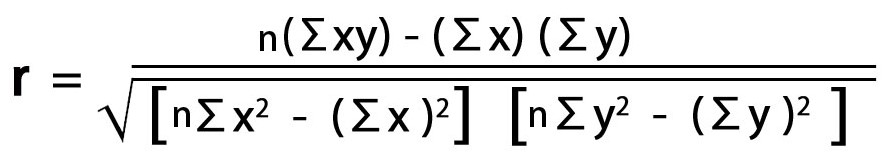

In [350]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Spanyol - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_spa_dth_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Spanyol - Total Deaths) adalah:
R = 0.9870 dan R^2 = 0.9742


visualisasi grafik persamaan eksponensial (Spanyol - *Total Deaths*)

In [351]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Total Deaths')

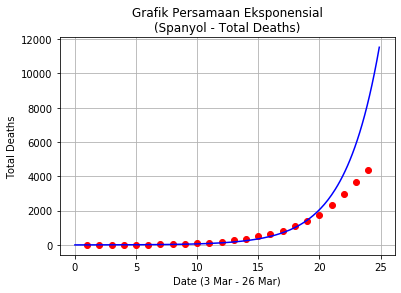

In [352]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Spanyol - Total Deaths)')
plt.xlabel('Date (3 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**3. Regresi Polinomial (Orde 3)**

In [353]:
y = spa_dth
x = date_spa_dth

membuat matriks A dan B

In [354]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[2.400000e+01, 3.000000e+02, 4.900000e+03, 9.000000e+04],
       [3.000000e+02, 4.900000e+03, 9.000000e+04, 1.763020e+06],
       [4.900000e+03, 9.000000e+04, 1.763020e+06, 3.597000e+07],
       [9.000000e+04, 1.763020e+06, 3.597000e+07, 7.547407e+08]])

In [355]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[2.07750000e+04, 4.31133000e+05, 9.17407300e+06, 1.98743055e+08]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [356]:
A = np.array([[2.400000e+01, 3.000000e+02, 4.900000e+03, 9.000000e+04],
       [3.000000e+02, 4.900000e+03, 9.000000e+04, 1.763020e+06],
       [4.900000e+03, 9.000000e+04, 1.763020e+06, 3.597000e+07],
       [9.000000e+04, 1.763020e+06, 3.597000e+07, 7.547407e+08]], dtype = 'float')
b = np.array([2.07750000e+04, 4.31133000e+05, 9.17407300e+06, 1.98743055e+08], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([-213.5342556 ,  134.90232124,  -19.9781995 ,    0.92580337])

In [357]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [358]:
print("Persaman Regresi Polinomial (Orde 3) (Spanyol - Total Deaths)")
print("y = {:.4f}x^3 + ({:.4f})x^2 + {:.4f}x + ({:.4f})".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Spanyol - Total Deaths)
y = 0.9258x^3 + (-19.9782)x^2 + 134.9023x + (-213.5343)


In [359]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_spa_dth = yreg
yreg_spa_dth

array([ -97.68433048,  -16.23598414,   36.36560364,   65.67525309,
         77.24778442,   76.63801786,   69.40077362,   61.09087193,
         57.263133  ,   63.47237706,   85.27342432,  128.22109501,
        197.87020934,  299.77558754,  439.49204982,  622.5744164 ,
        854.57750752, 1141.05614337, 1487.5651442 , 1899.6593302 ,
       2382.89352162, 2942.82253865, 3585.00120154, 4314.98433048])

menghitung koefisien korelasi

In [360]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_spa_dth))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Spanyol - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_spa_dth_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Spanyol - Total Deaths) adalah:
R = 0.9987 dan R^2 = 0.9974


visualisasi persamaan polinomial

Text(0, 0.5, 'Total Deaths')

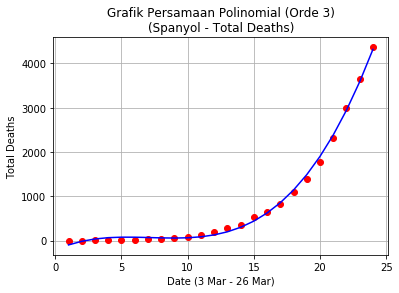

In [361]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_spa_dth,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Spanyol - Total Deaths)')
plt.xlabel('Date (3 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**Menentukan Kurva Regresi yang Paling Mewakili Data di Spanyol**

1. Data *Active Cases*

In [362]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_spa_act_1))
print("Eksponensial      : {:.4f}".format(R2_spa_act_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_spa_act_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9531
Eksponensial      : 0.9560
Polinomial Orde 3 : 0.9941


2. Data *Total Deaths*

In [363]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_spa_dth_1))
print("Eksponensial      : {:.4f}".format(R2_spa_dth_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_spa_dth_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9409
Eksponensial      : 0.9742
Polinomial Orde 3 : 0.9974


Jadi, data *active cases* dan data *total deaths* di Spanyol paling dapat diwakilkan dengan regresi polinomial orde 3.

# E.6. Jerman

## E.6.a. Jerman (Data *Active Cases*)

**1. Regresi Berpangkat**

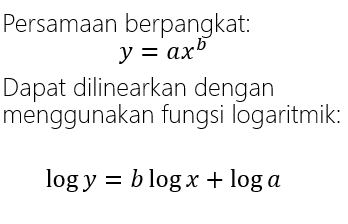
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* di Jerman, dan x adalah tanggalnya.

In [364]:
y = ger_act
x = date_ger_act

In [365]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
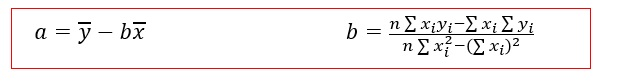

In [366]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [367]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

3.2015946765437

In [368]:
A = p.mean()-B*q.mean()
A

-1.3163675857457595

In [369]:
a = 10**A # A=log(a)
b = B

In [370]:
print("Persamaan Berpangkat (Jerman - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Jerman - Active Cases):
y = (0.0483)x^(3.2016)


menghitung koefisien korelasi menggunakan rumus berikut:
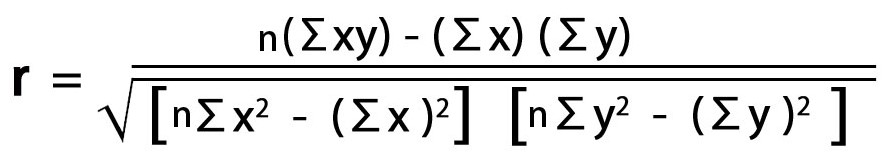

In [371]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Jerman - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ger_act_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Jerman - Active Cases) adalah:
R = 0.8289 dan R^2 = 0.6871


visualisasi grafik persamaan berpangkat (Jerman - *Active Cases*)

In [372]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

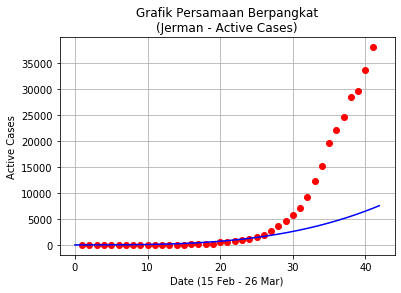

In [373]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Jerman - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**2. Regresi Eksponensial**

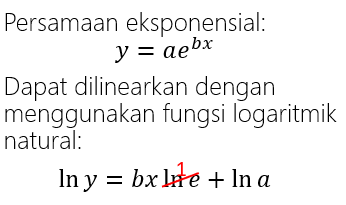
persamaan berikut dapat ditulis menjadi:
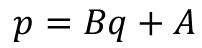

In [374]:
y = ger_act
x = date_ger_act

In [375]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
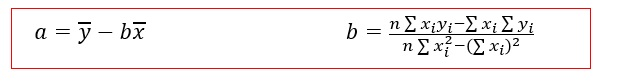

In [376]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [377]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.271766036457876

In [378]:
A = p.mean()-B*q.mean()
A

0.16653132731133624

In [379]:
a = np.e**A # A=log(a)
b = B

In [380]:
print("Persamaan Eksponensial (Jerman - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Jerman - Active Cases):
y = (1.1812)x^(0.2718)


menghitung koefisien korelasi menggunakan rumus berikut:
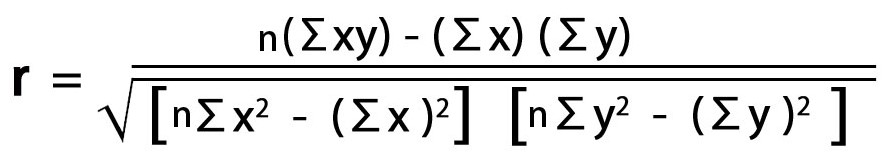

In [381]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Jerman - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ger_act_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Jerman - Active Cases) adalah:
R = 0.9631 dan R^2 = 0.9275


visualisasi grafik persamaan eksponensial (Jerman - *Active Cases*)

In [382]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Active Cases')

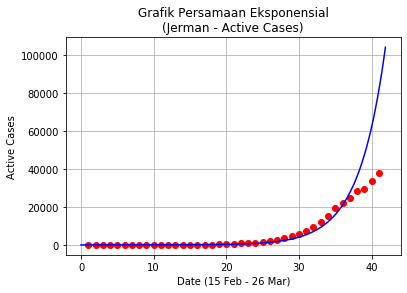

In [383]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Jerman - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**3. Regresi Polinomial (Orde 3)**

In [384]:
y = ger_act
x = date_ger_act

membuat matriks A dan B

In [385]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 1.90236789e+08]])

In [386]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[2.64818000e+05, 9.63698800e+06, 3.55487294e+08, 3.70887676e+08]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [387]:
A = np.array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 1.90236789e+08]], dtype = 'float')
b = np.array([2.64818000e+05, 9.63698800e+06, 3.55487294e+08, 3.70887676e+08], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 4.13767673e+03, -8.26963775e+02,  2.06535591e+01,  4.25187783e-01])

In [388]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [389]:
print("Persaman Regresi Polinomial (Orde 3) (Jerman - Active Cases)")
print("y = {:.4f}x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Jerman - Active Cases)
y = 0.4252x^3 + 20.6536x^2 + (-826.9638)x + 4137.6767


In [390]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_ger_act = yreg
yreg_ger_act

array([ 3.33179170e+03,  2.56976492e+03,  1.85414751e+03,  1.18749060e+03,
        5.72345309e+02,  1.12627730e+01, -4.93205885e+02, -9.38509538e+02,
       -1.32209706e+03, -1.64141732e+03, -1.89391920e+03, -2.07705156e+03,
       -2.18826329e+03, -2.22500325e+03, -2.18472032e+03, -2.06486337e+03,
       -1.86288128e+03, -1.57622291e+03, -1.20233715e+03, -7.38672856e+02,
       -1.82678913e+02,  4.68195809e+02,  1.21650244e+03,  2.06479210e+03,
        3.01561592e+03,  4.07152502e+03,  5.23507054e+03,  6.50880359e+03,
        7.89527531e+03,  9.39703683e+03,  1.10166393e+04,  1.27566337e+04,
        1.46195714e+04,  1.66080033e+04,  1.87244807e+04,  2.09715547e+04,
        2.33517763e+04,  2.58676967e+04,  2.85218670e+04,  3.13168384e+04,
        3.42551620e+04])

menghitung koefisien korelasi

In [391]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_ger_act))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Jerman - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ger_act_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Jerman - Active Cases) adalah:
R = 0.9804 dan R^2 = 0.9611


visualisasi persamaan polinomial

Text(0, 0.5, 'Active Cases')

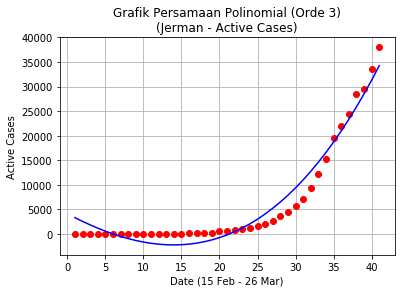

In [392]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_ger_act,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Jerman - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

## E.6.b. Jerman (Data *Total Deaths*)

**1. Regresi Berpangkat**

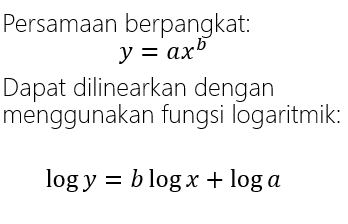
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Total Deaths* di Jerman, dan x adalah tanggalnya.

In [393]:
y = ger_dth
x = date_ger_dth

In [394]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
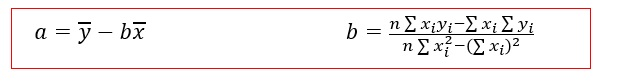

In [395]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [396]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

1.8755571685347403

In [397]:
A = p.mean()-B*q.mean()
A

-0.23996989536926638

In [398]:
a = 10**A # A=log(a)
b = B

In [399]:
print("Persamaan Berpangkat (Jerman - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Jerman - Total Deaths):
y = (0.5755)x^(1.8756)


menghitung koefisien korelasi menggunakan rumus berikut:
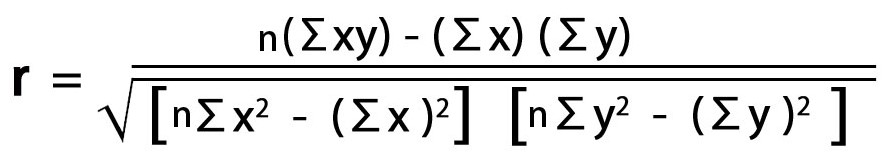

In [400]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Jerman - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ger_dth_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Jerman - Total Deaths) adalah:
R = 0.9481 dan R^2 = 0.8988


visualisasi grafik persamaan berpangkat (Jerman - *Total Deaths*)

In [401]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Total Deaths')

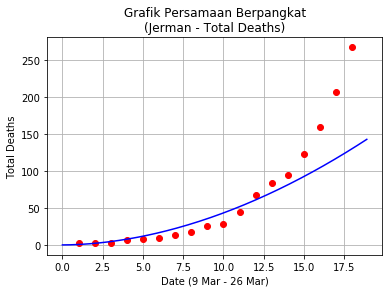

In [402]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Jerman - Total Deaths)')
plt.xlabel('Date (9 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**2. Regresi Eksponensial**

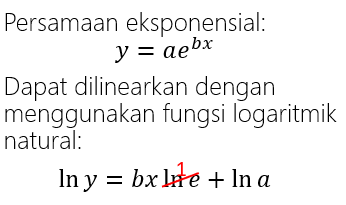
persamaan berikut dapat ditulis menjadi:
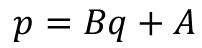

In [403]:
y = ger_dth
x = date_ger_dth

In [404]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
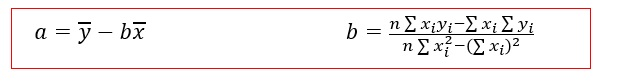

In [405]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [406]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.2957366169934668

In [407]:
A = p.mean()-B*q.mean()
A

0.43026982149188253

In [408]:
a = np.e**A # A=log(a)
b = B

In [409]:
print("Persamaan Eksponensial (Jerman - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Jerman - Total Deaths):
y = (1.5377)x^(0.2957)


menghitung koefisien korelasi menggunakan rumus berikut:
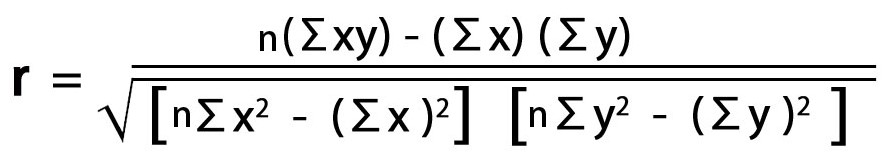

In [410]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Jerman - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ger_dth_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Jerman - Total Deaths) adalah:
R = 0.9953 dan R^2 = 0.9906


visualisasi grafik persamaan eksponensial (Jerman - *Total Deaths*)

In [411]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Total Deaths')

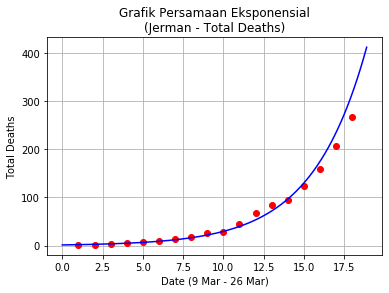

In [412]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Jerman - Total Deaths)')
plt.xlabel('Date (9 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**3. Regresi Polinomial (Orde 3)**

In [413]:
y = ger_dth
x = date_ger_dth

membuat matriks A dan B

In [414]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[1.80000000e+01, 1.71000000e+02, 2.10900000e+03, 2.92410000e+04],
       [1.71000000e+02, 2.10900000e+03, 2.92410000e+04, 4.32345000e+05],
       [2.10900000e+03, 2.92410000e+04, 4.32345000e+05, 6.65720100e+06],
       [2.92410000e+04, 4.32345000e+05, 6.65720100e+06, 1.05409929e+08]])

In [415]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[1.159000e+03, 1.727900e+04, 2.694450e+05, 4.317707e+06]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [416]:
A = np.array([[1.80000000e+01, 1.71000000e+02, 2.10900000e+03, 2.92410000e+04],
       [1.71000000e+02, 2.10900000e+03, 2.92410000e+04, 4.32345000e+05],
       [2.10900000e+03, 2.92410000e+04, 4.32345000e+05, 6.65720100e+06],
       [2.92410000e+04, 4.32345000e+05, 6.65720100e+06, 1.05409929e+08]], dtype = 'float')
b = np.array([1.159000e+03, 1.727900e+04, 2.694450e+05, 4.317707e+06], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([-8.77124183,  8.16027405, -1.40587375,  0.09871288])

In [417]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [418]:
print("Persaman Regresi Polinomial (Orde 3) (Jerman - Total Deaths)")
print("y = {:.4f}x^3 + ({:.4f})x^2 + {:.4f}x + ({:.4f})".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Jerman - Total Deaths)
y = 0.0987x^3 + (-1.4059)x^2 + 8.1603x + (-8.7712)


In [419]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_ger_dth = yreg
yreg_ger_dth

array([ -1.91812865,   2.71551428,   5.72196422,   7.69349845,
         9.22239422,  10.90092879,  13.32137943,  17.07602339,
        22.75713794,  30.95700034,  42.26788786,  57.28207774,
        76.59184727, 100.78947368, 130.46723426, 166.21740626,
       208.63226694, 258.30409357])

menghitung koefisien korelasi

In [420]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_ger_dth))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Jerman - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ger_dth_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Jerman - Total Deaths) adalah:
R = 0.9978 dan R^2 = 0.9956


Text(0, 0.5, 'Total Deaths')

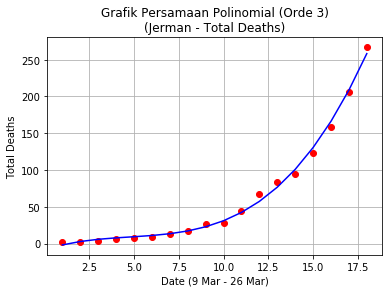

In [421]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_ger_dth,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Jerman - Total Deaths)')
plt.xlabel('Date (9 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**Menentukan Kurva Regresi yang Paling Mewakili Data di Jerman**

1. Data *Active Cases*

In [422]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_ger_act_1))
print("Eksponensial      : {:.4f}".format(R2_ger_act_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_ger_act_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.6871
Eksponensial      : 0.9275
Polinomial Orde 3 : 0.9611


2. Data *Total Deaths*

In [423]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_ger_dth_1))
print("Eksponensial      : {:.4f}".format(R2_ger_dth_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_ger_dth_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.8988
Eksponensial      : 0.9906
Polinomial Orde 3 : 0.9956


Jadi, data *active cases* dan data *total deaths* di Jerman paling dapat diwakilkan dengan regresi polinomial orde 3.

# E.7. Australia

## E.7.a. Australia (Data *Active Cases*)

**1. Regresi Berpangkat**

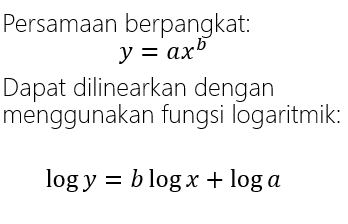
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* di Australia, dan x adalah tanggalnya.

In [424]:
y = aus_act
x = date_aus_act

In [425]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
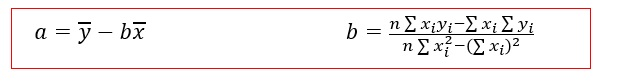

In [426]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [427]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

1.9739970763819124

In [428]:
A = p.mean()-B*q.mean()
A

-0.6083544294450032

In [429]:
a = 10**A # A=log(a)
b = B

In [430]:
print("Persamaan Berpangkat (Australia - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Australia - Active Cases):
y = (0.2464)x^(1.9740)


menghitung koefisien korelasi menggunakan rumus berikut:
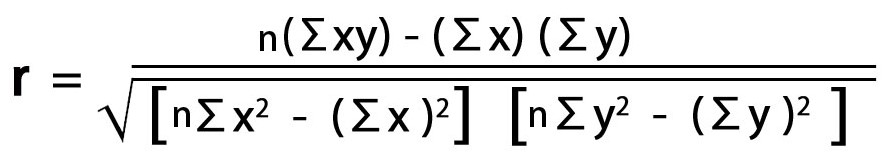

In [431]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Australia - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_aus_act_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Australia - Active Cases) adalah:
R = 0.8192 dan R^2 = 0.6711


visualisasi grafik persamaan berpangkat (Australia - *Active Cases*)

In [432]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

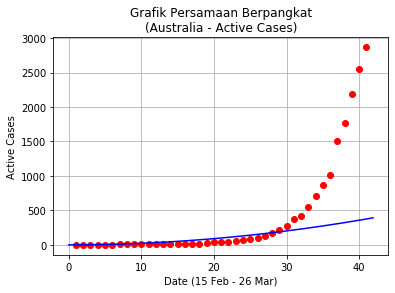

In [433]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Australia - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**2. Regresi Eksponensial**

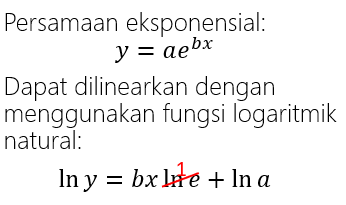
persamaan berikut dapat ditulis menjadi:
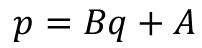

In [434]:
y = aus_act
x = date_aus_act

In [435]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
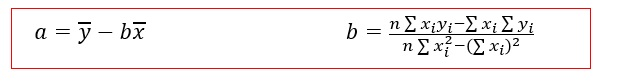

In [436]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [437]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.17188885462882655

In [438]:
A = p.mean()-B*q.mean()
A

0.4798681797152713

In [439]:
a = np.e**A # A=log(a)
b = B

In [440]:
print("Persamaan Eksponensial (Australia - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Australia - Active Cases):
y = (1.6159)x^(0.1719)


menghitung koefisien korelasi menggunakan rumus berikut:
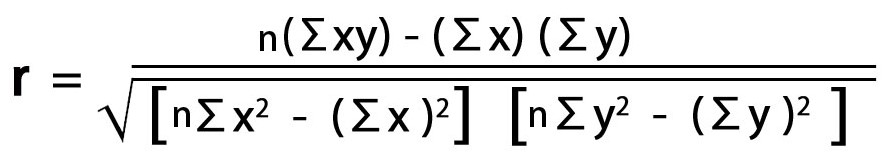

In [441]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Australia - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_aus_act_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Australia - Active Cases) adalah:
R = 0.9764 dan R^2 = 0.9533


visualisasi grafik persamaan eksponensial (Australia - *Active Cases*)

In [442]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Active Cases')

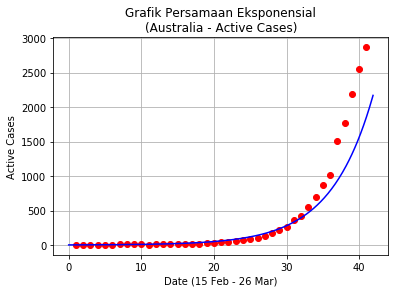

In [443]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Australia - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**3. Regresi Polinomial (Orde 3)**

In [444]:
y = aus_act
x = date_aus_act

membuat matriks A dan B

In [445]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 1.90236789e+08]])

In [446]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[1.62330000e+04, 5.97518000e+05, 2.23691140e+07, 8.46516602e+08]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [447]:
A = np.array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 1.90236789e+08]], dtype = 'float')
b = np.array([1.62330000e+04, 5.97518000e+05, 2.23691140e+07, 8.46516602e+08], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 4.71648356e+02, -9.70839878e+01,  3.39203783e+00, -4.27618151e-04])

In [448]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [449]:
print("Persaman Regresi Polinomial (Orde 3) (Australia - Active Cases)")
print("y = ({:.4f})x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Australia - Active Cases)
y = (-0.0004)x^3 + 3.3920x^2 + (-97.0840)x + 471.6484


In [450]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg

array([ 377.95597815,  291.04511048,  210.91318706,  137.55764219,
         70.97591015,   11.16542523,  -41.87637826,  -88.15206605,
       -127.66420385, -160.41535735, -186.40809227, -205.64497432,
       -218.12856921, -223.86144264, -222.84616033, -215.08528799,
       -200.58139131, -179.33703602, -151.35478782, -116.63721241,
        -75.18687552,  -27.00634284,   27.90181991,   89.53504703,
        157.8907728 ,  232.96643152,  314.75945747,  403.26728496,
        498.48734826,  600.41708168,  709.0539195 ,  824.39529602,
        946.43864551, 1075.18140229, 1210.62100063, 1352.75487483,
       1501.58045918, 1657.09518796, 1819.29649548, 1988.18181603,
       2163.74858388])

menghitung koefisien korelasi

In [451]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Australia - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Australia - Active Cases) adalah:
R = 0.9314 dan R^2 = 0.8676


visualisasi persamaan polinomial

Text(0, 0.5, 'Active Cases')

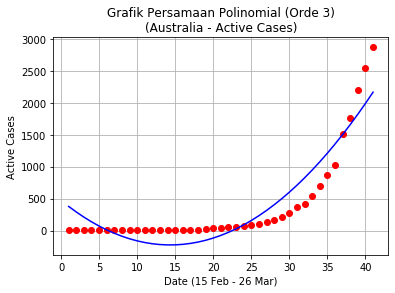

In [452]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Australia - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

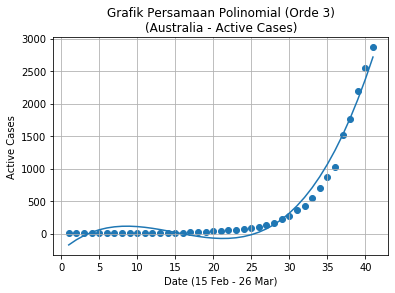

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Australia - Active Cases) adalah:
R = 0.9892 dan R^2 = 0.9786


In [453]:
#Namun, setelah dicocokkan di MS Excel, ternyata grafik di atas menyerupai regresi polinomial orde 2, maka seperti perlakuan pada data di Tiongkok, saya terpaksa menggunakan fungsi dari scikit-learn

model3 = np.poly1d(np.polyfit(x, y, 3))

line3 = np.linspace(1, 41, 41)

plt.scatter(x, y)
plt.plot(line3, model3(line3))
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Australia - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')
plt.show()

import sklearn
from sklearn.metrics import r2_score
r = np.sqrt(r2_score(y, model3(x)))
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Australia - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_aus_act_3 = r**2
yreg_aus_act = model3(line3)

## E.7.b. Australia (Data *Total Deaths*)

**1. Regresi Berpangkat**

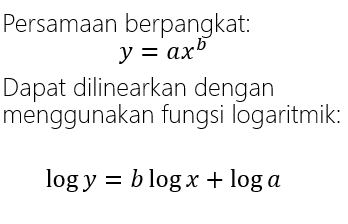
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Total Deaths* di Australia, dan x adalah tanggalnya.

In [454]:
y = aus_dth
x = date_aus_dth

In [455]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
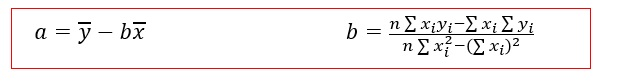

In [456]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [457]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.7911192340452929

In [458]:
A = p.mean()-B*q.mean()
A

-0.23727613204301223

In [459]:
a = 10**A # A=log(a)
b = B

In [460]:
print("Persamaan Berpangkat (Australia - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Australia - Total Deaths):
y = (0.5791)x^(0.7911)


menghitung koefisien korelasi menggunakan rumus berikut:
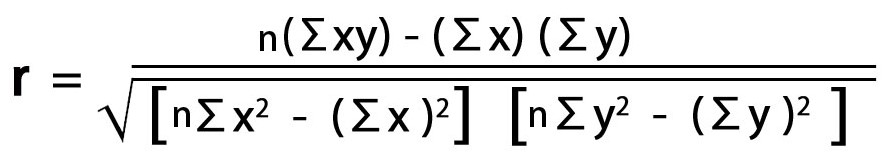

In [461]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Australia - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_aus_dth_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Australia - Total Deaths) adalah:
R = 0.9367 dan R^2 = 0.8774


visualisasi grafik persamaan berpangkat (Australia - *Total Deaths*)

In [462]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Total Deaths')

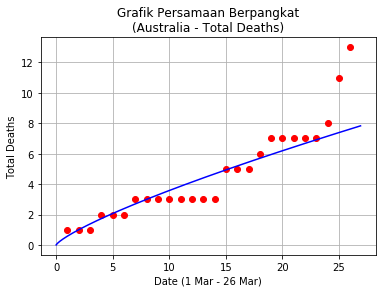

In [463]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Australia - Total Deaths)')
plt.xlabel('Date (1 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**2. Regresi Eksponensial**

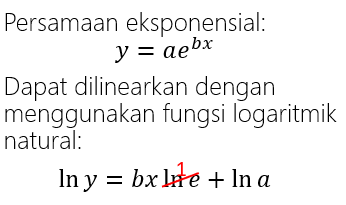
persamaan berikut dapat ditulis menjadi:
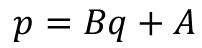

In [464]:
y = aus_dth
x = date_aus_dth

In [465]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
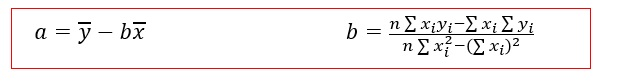

In [466]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [467]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.08925482619154311

In [468]:
A = p.mean()-B*q.mean()
A

0.11276176852075936

In [469]:
a = np.e**A # A=log(a)
b = B

In [470]:
print("Persamaan Eksponensial (Australia - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Australia - Total Deaths):
y = (1.1194)x^(0.0893)


menghitung koefisien korelasi menggunakan rumus berikut:
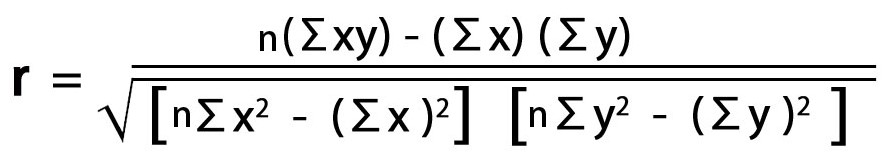

In [471]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Australia - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_aus_dth_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Australia - Total Deaths) adalah:
R = 0.9647 dan R^2 = 0.9306


visualisasi grafik persamaan eksponensial (Australia - *Total Deaths*)

In [472]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Total Deaths')

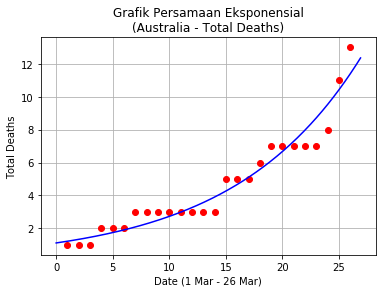

In [473]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Australia - Total Deaths)')
plt.xlabel('Date (1 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**3. Regresi Polinomial (Orde 3)**

In [474]:
y = aus_dth
x = date_aus_dth

membuat matriks A dan B

In [475]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[2.6000000e+01, 3.5100000e+02, 6.2010000e+03, 1.2320100e+05],
       [3.5100000e+02, 6.2010000e+03, 1.2320100e+05, 2.6106210e+06],
       [6.2010000e+03, 1.2320100e+05, 2.6106210e+06, 5.7617001e+07],
       [1.2320100e+05, 2.6106210e+06, 5.7617001e+07, 1.3077971e+09]])

In [476]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[1.2100e+02, 2.1760e+03, 4.4510e+04, 9.6901e+05]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [477]:
A = np.array([[2.6000000e+01, 3.5100000e+02, 6.2010000e+03, 1.2320100e+05],
       [3.5100000e+02, 6.2010000e+03, 1.2320100e+05, 2.6106210e+06],
       [6.2010000e+03, 1.2320100e+05, 2.6106210e+06, 5.7617001e+07],
       [1.2320100e+05, 2.6106210e+06, 5.7617001e+07, 1.3077971e+09]], dtype = 'float')
b = np.array([1.2100e+02, 2.1760e+03, 4.4510e+04, 9.6901e+05], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 0.18862827,  0.52166568, -0.03596811,  0.00126646])

In [478]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [479]:
print("Persaman Regresi Polinomial (Orde 3) (Australia - Total Deaths)")
print("y = {:.4f}x^3 + ({:.4f})x^2 + {:.4f}x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Australia - Total Deaths)
y = 0.0013x^3 + (-0.0360)x^2 + 0.5217x + 0.1886


In [480]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_aus_dth = yreg
yreg_aus_dth

array([ 0.6755923 ,  1.09821886,  1.46410673,  1.78085467,  2.05606146,
        2.29732585,  2.51224661,  2.70842252,  2.89345234,  3.07493483,
        3.26046877,  3.45765293,  3.67408606,  3.91736693,  4.19509433,
        4.514867  ,  4.88428373,  5.31094327,  5.80244439,  6.36638587,
        7.01036646,  7.74198494,  8.56884008,  9.49853063, 10.53865538,
       11.69681308])

menghitung koefisien korelasi

In [481]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_aus_dth))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Australia - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_aus_dth_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Australia - Total Deaths) adalah:
R = 0.9723 dan R^2 = 0.9454


Text(0, 0.5, 'Total Deaths')

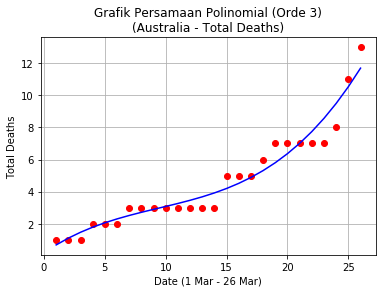

In [482]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_aus_dth,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Australia - Total Deaths)')
plt.xlabel('Date (1 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**Menentukan Kurva Regresi yang Paling Mewakili Data di Australia**

1. Data *Active Cases*

In [483]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_aus_act_1))
print("Eksponensial      : {:.4f}".format(R2_aus_act_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_aus_act_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.6711
Eksponensial      : 0.9533
Polinomial Orde 3 : 0.9786


2. Data *Total Deaths*

In [484]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_aus_dth_1))
print("Eksponensial      : {:.4f}".format(R2_aus_dth_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_aus_dth_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.8774
Eksponensial      : 0.9306
Polinomial Orde 3 : 0.9454


Jadi, data *active cases* dan data *total deaths* di Australia paling dapat diwakilkan dengan regresi polinomial orde 3.

# E.8. Amerika Serikat

## E.8.a. Amerika Serikat (Data *Active Cases*)

**1. Regresi Berpangkat**

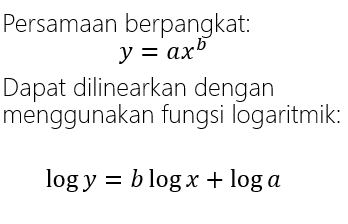
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* di Amerika Serikat, dan x adalah tanggalnya.

In [485]:
y = usa_act
x = date_usa_act

In [486]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
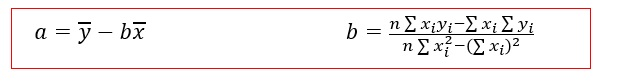

In [487]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [488]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

2.782845110701927

In [489]:
A = p.mean()-B*q.mean()
A

-0.6953755297695094

In [490]:
a = 10**A # A=log(a)
b = B

In [491]:
print("Persamaan Berpangkat (Amerika Serikat - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Amerika Serikat - Active Cases):
y = (0.2017)x^(2.7828)


menghitung koefisien korelasi menggunakan rumus berikut:
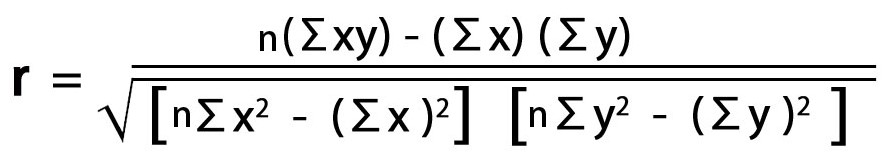

In [492]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Amerika Serikat - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_usa_act_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Amerika Serikat - Active Cases) adalah:
R = 0.8475 dan R^2 = 0.7182


visualisasi grafik persamaan berpangkat (Amerika Serikat - *Active Cases*)

In [493]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

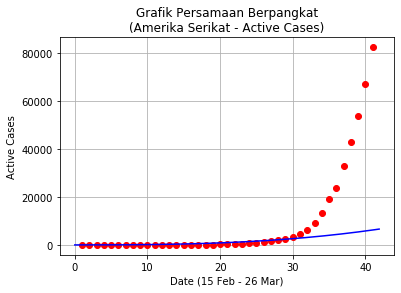

In [494]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Amerika Serikat - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**2. Regresi Eksponensial**

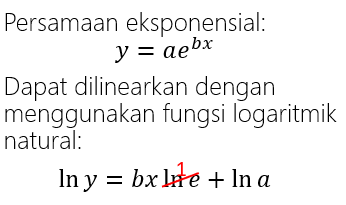
persamaan berikut dapat ditulis menjadi:
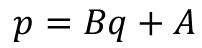

In [635]:
y = usa_act
x = date_usa_act

In [636]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
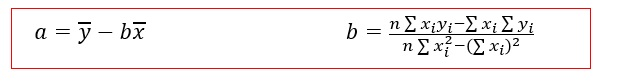

In [637]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [638]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.23673466456883444

In [639]:
A = p.mean()-B*q.mean()
A

1.167399708071656

In [640]:
a = np.e**A # A=log(a)
b = B

In [641]:
print("Persamaan Eksponensial (Amerika Serikat - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Amerika Serikat - Active Cases):
y = (3.2136)x^(0.2367)


menghitung koefisien korelasi menggunakan rumus berikut:
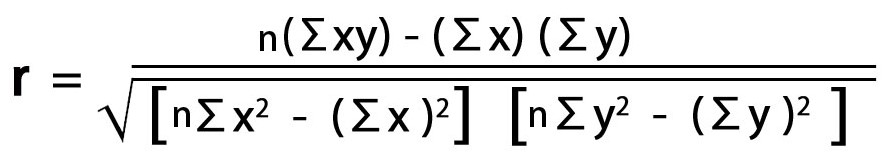

In [642]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Amerika Serikat - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_usa_act_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Amerika Serikat - Active Cases) adalah:
R = 0.9867 dan R^2 = 0.9736


visualisasi grafik persamaan eksponensial (Amerika Serikat - *Active Cases*)

In [643]:
xreg = x
yreg = a*(np.e**(b*xreg))
yreg_usa_act = yreg

Text(0, 0.5, 'Active Cases')

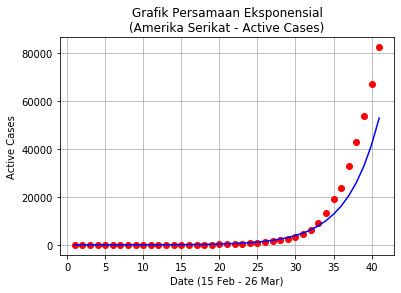

In [644]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg_usa_act,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Amerika Serikat - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

**3. Regresi Polinomial (Orde 3)**

In [613]:
y = usa_act
x = date_usa_act

membuat matriks A dan B

In [614]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 1.90236789e+08]])

In [615]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[ 3.69322000e+05,  1.39938740e+07,  5.34679344e+08,
        -9.13997118e+08]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [616]:
A = np.array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 1.90236789e+08]], dtype = 'float')
b = np.array([ 3.69322000e+05,  1.39938740e+07,  5.34679344e+08,
        -9.13997118e+08], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 1.06464097e+04, -1.96325287e+03,  4.62745253e+01,  7.02630112e-01])

In [617]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [618]:
print("Persaman Regresi Polinomial (Orde 3) (Amerika Serikat - Active Cases)")
print("y = ({:.4f})x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Amerika Serikat - Active Cases)
y = (0.7026)x^3 + 46.2745x^2 + (-1963.2529)x + 10646.4097


In [619]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg

array([ 8730.13394865,  6910.62306476,  5192.0927929 ,  3578.75891375,
        2074.83720797,   684.54345624,  -587.90656077, -1738.29706239,
       -2762.41226795, -3656.03639677, -4414.95366819, -5034.94830153,
       -5511.80451612, -5841.30653128, -6019.23856635, -6041.38484066,
       -5903.52957353, -5601.45698429, -5130.95129227, -4487.7967168 ,
       -3667.7774772 , -2666.67779281, -1480.28188295,  -104.37396695,
        1465.26173587,  3232.84100616,  5202.57962462,  7378.69337189,
        9765.39802867, 12366.90937562, 15187.44319341, 18231.21526272,
       21502.44136421, 25005.33727856, 28744.11878644, 32723.00166852,
       36946.20170547, 41417.93467797, 46142.41636669, 51123.86255229,
       56366.48901545])

menghitung koefisien korelasi

In [620]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Amerika Serikat - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Amerika Serikat - Active Cases) adalah:
R = 0.9156 dan R^2 = 0.8384


visualisasi persamaan polinomial

Text(0, 0.5, 'Active Cases')

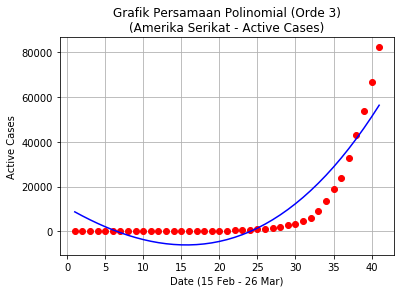

In [621]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Amerika Serikat - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')

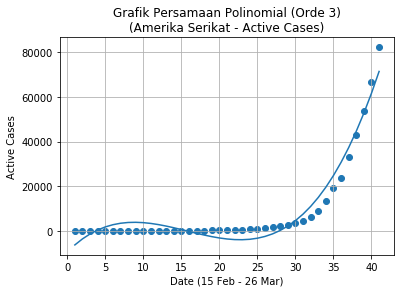

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Amerika Serikat - Active Cases) adalah:
R = 0.9784 dan R^2 = 0.9572


In [622]:
#Namun, setelah dicocokkan di MS Excel, ternyata grafik di atas menyerupai regresi polinomial orde 2, maka seperti perlakuan pada data di Tiongkok dan Australia, saya terpaksa menggunakan fungsi dari scikit-learn

model = np.poly1d(np.polyfit(x, y, 3))

line = np.linspace(1, 41, 41)

plt.scatter(x, y)
plt.plot(line, model(line))
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Amerika Serikat - Active Cases)')
plt.xlabel('Date (15 Feb - 26 Mar)')
plt.ylabel('Active Cases')
plt.show()

import sklearn
from sklearn.metrics import r2_score
r = np.sqrt(r2_score(y, model(x)))
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Amerika Serikat - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_usa_act_3 = r**2

## E.8.b. Amerika Serikat (Data *Total Deaths*)

**1. Regresi Berpangkat**

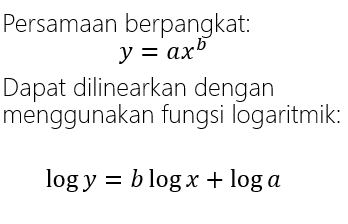
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Total Deaths* di Amerika Serikat, dan x adalah tanggalnya.

In [515]:
y = usa_dth
x = date_usa_dth

In [516]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
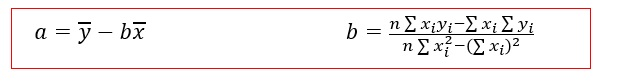

In [517]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [518]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

2.1398614237434

In [519]:
A = p.mean()-B*q.mean()
A

-0.4907848225441982

In [520]:
a = 10**A # A=log(a)
b = B

In [521]:
print("Persamaan Berpangkat (Amerika Serikat - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Amerika Serikat - Total Deaths):
y = (0.3230)x^(2.1399)


menghitung koefisien korelasi menggunakan rumus berikut:
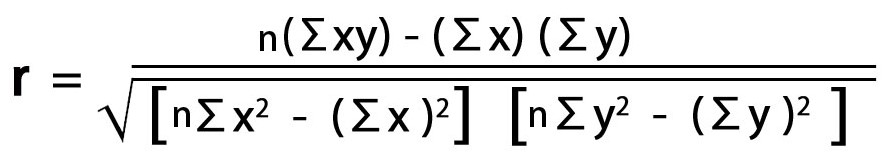

In [522]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Amerika Serikat - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_usa_dth_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Amerika Serikat - Total Deaths) adalah:
R = 0.9480 dan R^2 = 0.8986


visualisasi grafik persamaan berpangkat (Amerika Serikat - *Total Deaths*)

In [523]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Total Deaths')

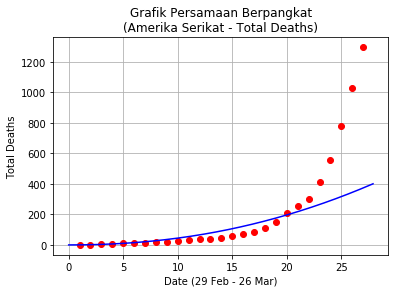

In [524]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Amerika Serikat - Total Deaths)')
plt.xlabel('Date (29 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**2. Regresi Eksponensial**

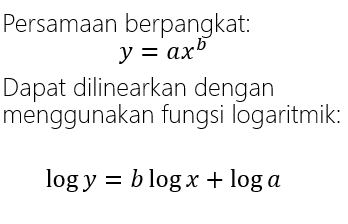
persamaan berikut dapat ditulis menjadi:
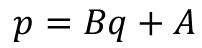

In [525]:
y = usa_dth
x = date_usa_dth

In [526]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
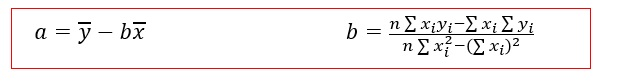

In [527]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [528]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.23429863973973036

In [529]:
A = p.mean()-B*q.mean()
A

0.7061965799693066

In [530]:
a = np.e**A # A=log(a)
b = B

In [531]:
print("Persamaan Eksponensial (Amerika Serikat - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Amerika Serikat - Total Deaths):
y = (2.0263)x^(0.2343)


menghitung koefisien korelasi menggunakan rumus berikut:
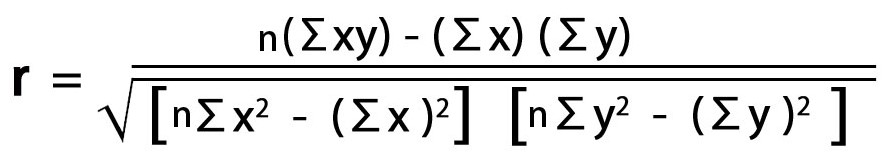

In [532]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Amerika Serikat - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_usa_dth_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Amerika Serikat - Total Deaths) adalah:
R = 0.9793 dan R^2 = 0.9590


visualisasi grafik persamaan eksponensial (Amerika Serikat - *Total Deaths*)

In [533]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Total Deaths')

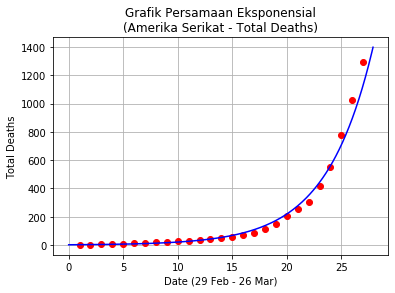

In [534]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Amerika Serikat - Total Deaths)')
plt.xlabel('Date (29 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**3. Regresi Polinomial (Orde 3)**

In [535]:
y = usa_dth
x = date_usa_dth

membuat matriks A dan B

In [536]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[2.70000000e+01, 3.78000000e+02, 6.93000000e+03, 1.42884000e+05],
       [3.78000000e+02, 6.93000000e+03, 1.42884000e+05, 3.14206200e+06],
       [6.93000000e+03, 1.42884000e+05, 3.14206200e+06, 7.19659080e+07],
       [1.42884000e+05, 3.14206200e+06, 7.19659080e+07, 1.69521759e+09]])

In [537]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[5.5850000e+03, 1.3126400e+05, 3.1831360e+06, 7.8613406e+07]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [538]:
A = np.array([[2.70000000e+01, 3.78000000e+02, 6.93000000e+03, 1.42884000e+05],
       [3.78000000e+02, 6.93000000e+03, 1.42884000e+05, 3.14206200e+06],
       [6.93000000e+03, 1.42884000e+05, 3.14206200e+06, 7.19659080e+07],
       [1.42884000e+05, 3.14206200e+06, 7.19659080e+07, 1.69521759e+09]], dtype = 'float')
b = np.array([5.5850000e+03, 1.3126400e+05, 3.1831360e+06, 7.8613406e+07], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([-126.8022792 ,   69.19380751,   -8.07054299,    0.27142483])

In [539]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [540]:
print("Persaman Regresi Polinomial (Orde 3) (Amerika Serikat - Total Deaths)")
print("y = {:.4f}x^3 + ({:.4f})x^2 + {:.4f}x + ({:.4f})".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Amerika Serikat - Total Deaths)
y = 0.2714x^3 + (-8.0705)x^2 + 69.1938x + (-126.8023)


In [541]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_usa_dth = yreg
yreg_usa_dth

array([ -65.40758986,  -18.52543753,   15.47272676,   38.21545198,
         51.3312871 ,   56.4487811 ,   55.19648296,   49.20294163,
         40.0967061 ,   29.50632535,   19.06034834,   10.38732404,
          5.11580144,    4.8743295 ,   11.2914572 ,   25.99573351,
         50.61570741,   86.77992786,  136.11694385,  200.25530434,
        280.82355831,  379.45025473,  497.76394257,  637.39317081,
        799.96648843,  987.11244439, 1200.45958767])

menghitung koefisien korelasi

In [542]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_usa_dth))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Amerika Serikat - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_usa_dth_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Amerika Serikat - Total Deaths) adalah:
R = 0.9907 dan R^2 = 0.9816


Text(0, 0.5, 'Total Deaths')

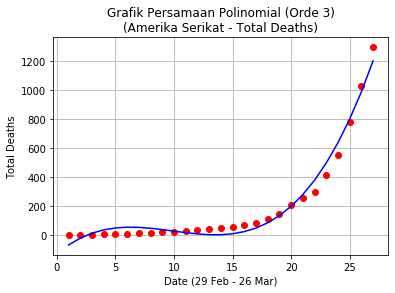

In [543]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_usa_dth,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Amerika Serikat - Total Deaths)')
plt.xlabel('Date (29 Feb - 26 Mar)')
plt.ylabel('Total Deaths')

**Menentukan Kurva Regresi yang Paling Mewakili Data di Amerika Serikat**

1. Data *Active Cases*

In [544]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_usa_act_1))
print("Eksponensial      : {:.4f}".format(R2_usa_act_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_usa_act_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.7182
Eksponensial      : 0.9736
Polinomial Orde 3 : 0.9572


2. Data *Total Deaths*

In [545]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_usa_dth_1))
print("Eksponensial      : {:.4f}".format(R2_usa_dth_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_usa_dth_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.8986
Eksponensial      : 0.9590
Polinomial Orde 3 : 0.9816


Jadi, data *active cases* di Amerika Serikat paling dapat diwakilkan dengan regresi eksponensial, sedangkan data *total deaths* di negara tersebut paling dapat diwakilkan dengan regresi polinomial orde 3.

# E.9. Indonesia

## E.9.a. Indonesia (Data *Active Cases*)

**1. Regresi Berpangkat**

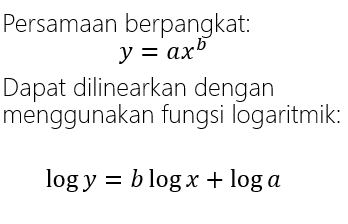
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Active Cases* di Indonesia, dan x adalah tanggalnya.

In [546]:
y = ina_act
x = date_ina_act

In [547]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
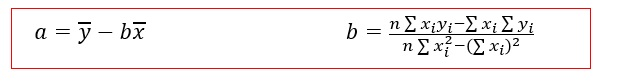

In [548]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [549]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

2.3598104643023485

In [550]:
A = p.mean()-B*q.mean()
A

-0.6777846306149347

In [551]:
a = 10**A # A=log(a)
b = B

In [552]:
print("Persamaan Berpangkat (Indonesia - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Indonesia - Active Cases):
y = (0.2100)x^(2.3598)


menghitung koefisien korelasi menggunakan rumus berikut:
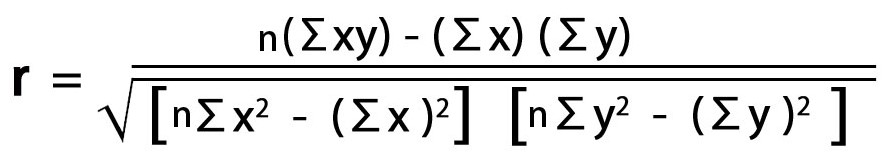

In [553]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Indonesia - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ina_act_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Indonesia - Active Cases) adalah:
R = 0.9341 dan R^2 = 0.8725


visualisasi grafik persamaan berpangkat (Indonesia - *Active Cases*)

In [554]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Active Cases')

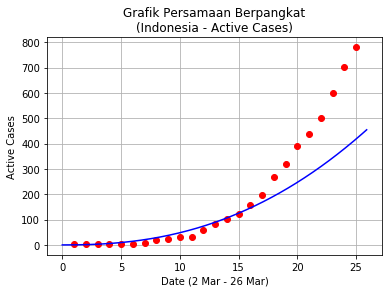

In [555]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Indonesia - Active Cases)')
plt.xlabel('Date (2 Mar - 26 Mar)')
plt.ylabel('Active Cases')

**2. Regresi Eksponensial**

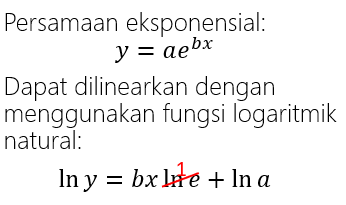
persamaan berikut dapat ditulis menjadi:
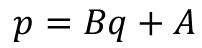

In [556]:
y = ina_act
x = date_ina_act

In [557]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
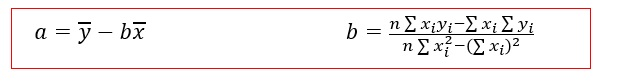

In [558]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [559]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.2815331687029616

In [560]:
A = p.mean()-B*q.mean()
A

0.2545126030451468

In [561]:
a = np.e**A # A=log(a)
b = B

In [562]:
print("Persamaan Eksponensial (Indonesia - Active Cases):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Indonesia - Active Cases):
y = (1.2898)x^(0.2815)


menghitung koefisien korelasi menggunakan rumus berikut:
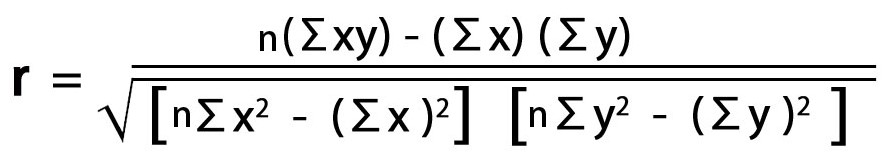

In [563]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Indonesia - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ina_act_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Indonesia - Active Cases) adalah:
R = 0.9831 dan R^2 = 0.9665


visualisasi grafik persamaan eksponensial (Indonesia - *Active Cases*)

In [564]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Active Cases')

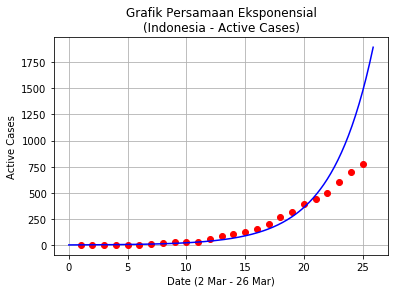

In [565]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Indonesia - Active Cases)')
plt.xlabel('Date (2 Mar - 26 Mar)')
plt.ylabel('Active Cases')

**3. Regresi Polinomial (Orde 3)**

In [566]:
y = ina_act
x = date_ina_act

membuat matriks A dan B

In [567]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[2.50000000e+01, 3.25000000e+02, 5.52500000e+03, 1.05625000e+05],
       [3.25000000e+02, 5.52500000e+03, 1.05625000e+05, 2.15364500e+06],
       [5.52500000e+03, 1.05625000e+05, 2.15364500e+06, 4.57356250e+07],
       [1.05625000e+05, 2.15364500e+06, 4.57356250e+07, 9.98881325e+08]])

In [568]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[4.848000e+03, 1.011240e+05, 2.181112e+06, 4.815036e+07]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [569]:
A = np.array([[2.50000000e+01, 3.25000000e+02, 5.52500000e+03, 1.05625000e+05],
       [3.25000000e+02, 5.52500000e+03, 1.05625000e+05, 2.15364500e+06],
       [5.52500000e+03, 1.05625000e+05, 2.15364500e+06, 4.57356250e+07],
       [1.05625000e+05, 2.15364500e+06, 4.57356250e+07, 9.98881325e+08]], dtype = 'float')
b = np.array([4.848000e+03, 1.011240e+05, 2.181112e+06, 4.815036e+07], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 3.93343874,  0.34794996, -0.48176751,  0.06909676])

In [570]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [571]:
print("Persaman Regresi Polinomial (Orde 3) (Indonesia - Active Cases)")
print("y = {:.4f}x^3 + ({:.4f})x^2 + {:.4f}x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Indonesia - Active Cases)
y = 0.0691x^3 + (-0.4818)x^2 + 0.3479x + 3.9334


In [572]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_ina_act = yreg
yreg_ina_act

array([  3.86871795,   3.25504274,   2.50699368,   2.03915138,
         2.26609642,   3.60240938,   6.46267086,  11.26146144,
        18.41336171,  28.33295227,  41.43481369,  58.13352657,
        78.8436715 , 103.97982906, 133.95657985, 169.18850444,
       210.09018344, 257.07619743, 310.56112699, 370.95955272,
       438.6860552 , 514.15521503, 597.78161278, 689.97982906,
       791.16444444])

menghitung koefisien korelasi

In [573]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_ina_act))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Indonesia - Active Cases) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ina_act_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Indonesia - Active Cases) adalah:
R = 0.9993 dan R^2 = 0.9986


visualisasi persamaan polinomial

Text(0, 0.5, 'Active Cases')

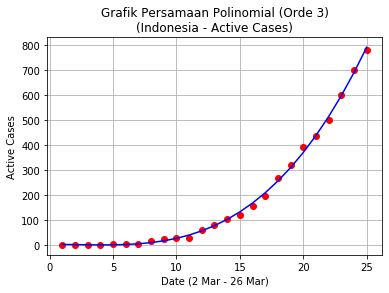

In [574]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_ina_act,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Indonesia - Active Cases)')
plt.xlabel('Date (2 Mar - 26 Mar)')
plt.ylabel('Active Cases')

## E.9.b. Indonesia (Data *Total Deaths*)

**1. Regresi Berpangkat**

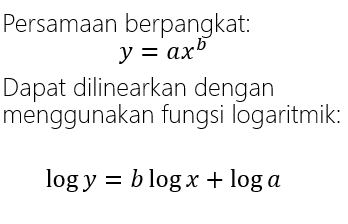
Di sini log(y) adalah p, log(x) adalah q, b adalah B, log(a) adalah A. Dengan y adalah *Total Deaths* di Indonesia, dan x adalah tanggalnya.

In [575]:
y = ina_dth
x = date_ina_dth

In [576]:
p = np.log10(y)
q = np.log10(x)

menghitung nilai a dan b menggunakan rumus berikut:
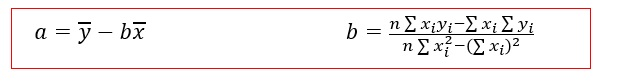

In [577]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [578]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

1.754583353728673

In [579]:
A = p.mean()-B*q.mean()
A

-0.331194973033349

In [580]:
a = 10**A # A=log(a)
b = B

In [581]:
print("Persamaan Berpangkat (Indonesia - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Berpangkat (Indonesia - Total Deaths):
y = (0.4664)x^(1.7546)


menghitung koefisien korelasi menggunakan rumus berikut:
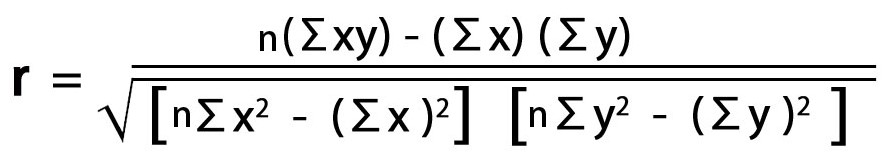

In [582]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Berpangkat (Indonesia - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ina_dth_1 = r**2

Nilai R dan R^2 untuk Persamaan Berpangkat (Indonesia - Total Deaths) adalah:
R = 0.9604 dan R^2 = 0.9224


visualisasi grafik persamaan berpangkat (Indonesia - *Total Deaths*)

In [583]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(xreg**b)

Text(0, 0.5, 'Total Deaths')

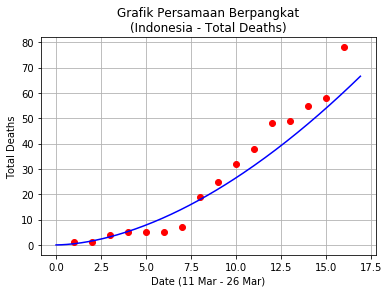

In [584]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Berpangkat\n(Indonesia - Total Deaths)')
plt.xlabel('Date (11 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**2. Regresi Eksponensial**

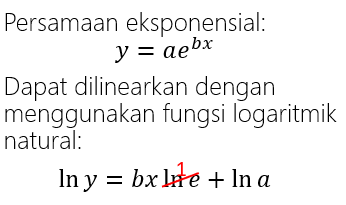
persamaan berikut dapat ditulis menjadi:
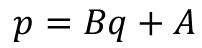

In [585]:
y = ina_dth
x = date_ina_dth

In [586]:
p = np.log(y)
q = x

menghitung nilai a dan b menggunakan rumus berikut:
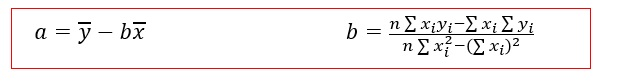

In [587]:
n = len(q)
pq = p*q
pp = p**2
qq = q**2

In [588]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.2916415545683637

In [589]:
A = p.mean()-B*q.mean()
A

0.12196312651423691

In [590]:
a = np.e**A # A=log(a)
b = B

In [591]:
print("Persamaan Eksponensial (Indonesia - Total Deaths):")
print("y = ({:.4f})x^({:.4f})".format(a,b))

Persamaan Eksponensial (Indonesia - Total Deaths):
y = (1.1297)x^(0.2916)


menghitung koefisien korelasi menggunakan rumus berikut:
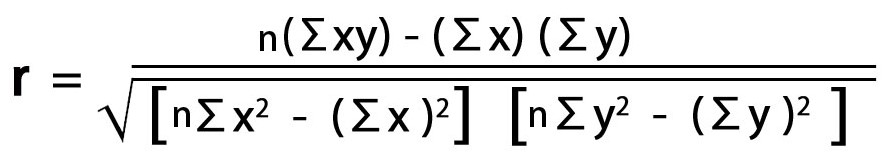

In [592]:
r = ((n*pq.sum()-(p.sum()*q.sum()))/(np.sqrt(((n*pp.sum())-(p.sum())**2)*((n*qq.sum())-(q.sum())**2))))
print("Nilai R dan R^2 untuk Persamaan Eksponensial (Indonesia - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ina_dth_2 = r**2

Nilai R dan R^2 untuk Persamaan Eksponensial (Indonesia - Total Deaths) adalah:
R = 0.9631 dan R^2 = 0.9276


visualisasi grafik persamaan eksponensial (Indonesia - *Total Deaths*)

In [593]:
xreg = np.array(range(0,(x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'Total Deaths')

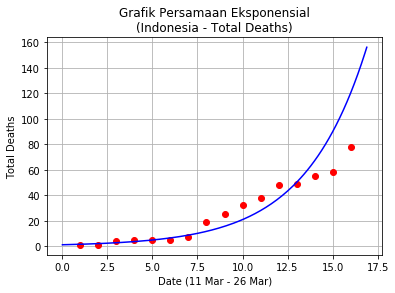

In [594]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.title('Grafik Persamaan Eksponensial\n(Indonesia - Total Deaths)')
plt.xlabel('Date (11 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**3. Regresi Polinomial (Orde 3)**

In [595]:
y = ina_dth
x = date_ina_dth

membuat matriks A dan B

In [596]:
#Matriks A
A = np.zeros((4, 4), dtype = float)
for i in range(0, 4):
    for j in range(0, 4) :
        A[i][j] = (x**(j+i)).sum()

A

array([[1.6000000e+01, 1.3600000e+02, 1.4960000e+03, 1.8496000e+04],
       [1.3600000e+02, 1.4960000e+03, 1.8496000e+04, 2.4384800e+05],
       [1.4960000e+03, 1.8496000e+04, 2.4384800e+05, 3.3477760e+06],
       [1.8496000e+04, 2.4384800e+05, 3.3477760e+06, 4.7260136e+07]])

In [597]:
#Matriks B
B = np.zeros((1, 4), dtype = float)
for i in range(0, 4) :
    B[0][i] = ((x**i)*y).sum()
    
B

array([[4.30000e+02, 5.35500e+03, 7.07990e+04, 9.71829e+05]])

mencari koefisien persamaan dengan menggunakan eliminasi gauss

In [598]:
A = np.array([[1.6000000e+01, 1.3600000e+02, 1.4960000e+03, 1.8496000e+04],
       [1.3600000e+02, 1.4960000e+03, 1.8496000e+04, 2.4384800e+05],
       [1.4960000e+03, 1.8496000e+04, 2.4384800e+05, 3.3477760e+06],
       [1.8496000e+04, 2.4384800e+05, 3.3477760e+06, 4.7260136e+07]], dtype = 'float')
b = np.array([4.30000e+02, 5.35500e+03, 7.07990e+04, 9.71829e+05], dtype = 'float')

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]
    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - (m*b)

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]
    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i]/b[i]
        Ab[j] = a - (m*b)
        
X = Ab[:, 4]
X

array([ 4.65384615, -3.20985486,  0.7486604 , -0.01772909])

In [599]:
a0 = X[0]
a1 = X[1]
a2 = X[2]
a3 = X[3]

In [600]:
print("Persaman Regresi Polinomial (Orde 3) (Indonesia - Total Deaths)")
print("y = ({:.4f})x^3 + {:.4f}x^2 + ({:.4f})x + {:.4f}".format(a3, a2, a1, a0))

Persaman Regresi Polinomial (Orde 3) (Indonesia - Total Deaths)
y = (-0.0177)x^3 + 0.7487x^2 + (-3.2099)x + 4.6538


In [601]:
yreg = a0 + a1*x + a2*(x**2) + a3*(x**3)
yreg_ina_dth = yreg
yreg_ina_dth

array([ 2.1749226 ,  1.0869453 ,  1.28353973,  2.65833135,  5.10494562,
        8.51700802, 12.788144  , 17.81197904, 23.4821386 , 29.69224815,
       36.33593316, 43.30681908, 50.4985314 , 57.80469556, 65.11893705,
       72.33488132])

menghitung koefisien korelasi

In [602]:
yDt = ((y - y.mean()))**2
yD = ((y - yreg_ina_dth))**2
r = np.sqrt(abs(yDt.sum() - yD.sum())/yDt.sum())
print("Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Indonesia - Total Deaths) adalah:")
print("R = {:.4f} dan R^2 = {:.4f}".format(r,r**2))
R2_ina_dth_3 = r**2

Nilai R dan R^2 untuk Persamaan Polinomial (Orde 3) (Indonesia - Total Deaths) adalah:
R = 0.9898 dan R^2 = 0.9797


visualisasi persamaan polinomial

Text(0, 0.5, 'Total Deaths')

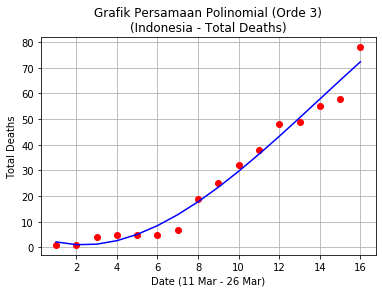

In [603]:
ax = plt.plot(x,y,'ro')
plt.plot(x,yreg_ina_dth,'b')
plt.grid()
plt.title('Grafik Persamaan Polinomial (Orde 3)\n(Indonesia - Total Deaths)')
plt.xlabel('Date (11 Mar - 26 Mar)')
plt.ylabel('Total Deaths')

**Menentukan Kurva Regresi yang Paling Mewakili Data di Indonesia**

1. Data *Active Cases*

In [604]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_ina_act_1))
print("Eksponensial      : {:.4f}".format(R2_ina_act_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_ina_act_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.8725
Eksponensial      : 0.9665
Polinomial Orde 3 : 0.9986


2. Data *Total Deaths*

In [605]:
print("R^2 score setiap jenis Regresi:")
print("Pangkat           : {:.4f}".format(R2_ina_dth_1))
print("Eksponensial      : {:.4f}".format(R2_ina_dth_2))
print("Polinomial Orde 3 : {:.4f}".format(R2_ina_dth_3))

R^2 score setiap jenis Regresi:
Pangkat           : 0.9224
Eksponensial      : 0.9276
Polinomial Orde 3 : 0.9797


Jadi, data *active cases* dan data *total deaths* di Indonesia paling dapat diwakilkan dengan regresi polinomial orde 3.


# F. PERBANDINGAN LAJU PERTUMBUHAN ANTAR NEGARA

## F.1. Data *Active Cases*

ditampilkan grafik data *active cases* dari hari ke-0 hingga hari ke-24 untuk masing-masing kasus di setiap negara

In [645]:
date_all = np.arange(25)
yreg_chi_act = yreg_chi_act_up[0:25]
yreg_kor_act = yreg_kor_act_up[0:25]

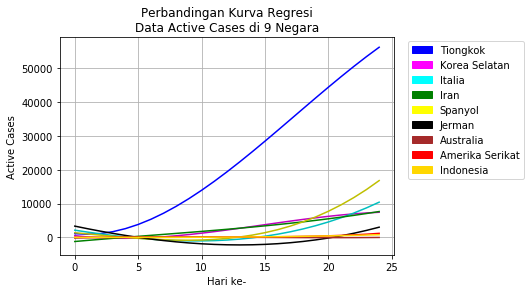

In [646]:
plt.plot(date_all,yreg_chi_act,'b')
plt.plot(date_all,yreg_kor_act,'m')
plt.plot(date_all,yreg_ita_act[0:25],'c')
plt.plot(date_all,yreg_iran_act[0:25],'g')
plt.plot(date_all,yreg_spa_act[0:25],'y')
plt.plot(date_all,yreg_ger_act[0:25],'k')
plt.plot(date_all,yreg_aus_act[0:25],'brown')
plt.plot(date_all,yreg_usa_act[0:25],'r')
plt.plot(date_all,yreg_ina_act,'gold')
plt.grid()
plt.title('Perbandingan Kurva Regresi\nData Active Cases di 9 Negara')
plt.xlabel('Hari ke-')
plt.ylabel('Active Cases')

blue_patch = mpatches.Patch(color='blue', label='Tiongkok')
magenta_patch = mpatches.Patch(color='magenta', label='Korea Selatan')
cyan_patch = mpatches.Patch(color='cyan', label='Italia')
green_patch = mpatches.Patch(color='green', label='Iran')
yellow_patch = mpatches.Patch(color='yellow', label='Spanyol')
black_patch = mpatches.Patch(color='black', label='Jerman')
brown_patch = mpatches.Patch(color='brown', label='Australia')
red_patch = mpatches.Patch(color='red', label='Amerika Serikat')
gold_patch = mpatches.Patch(color='gold', label='Indonesia')
plt.legend(handles=[blue_patch,magenta_patch,cyan_patch,green_patch,yellow_patch,black_patch,brown_patch,red_patch,gold_patch]
           , loc=(1.04,0.35))

Dari grafik di atas, kita dapat melihat laju persebaran COVID-19 di 9 negara. Kita melihat bahwa Tiongkok memiliki laju *active cases* tertinggi dibandingkan negara lain. Hal ini terjadi karena Tiongkok merupakan asal dari virus tersebut muncul. Posisi kedua ditempati Spanyol. Menurut artikel yang dimuat di *CNN*, perkiraan virus tersebut menyebar luas di Spanyol adalah karena ada beberapa acara besar yang dihelat di Italia, yang merupakan negara dengan jumlah *active cases* yang sangat banyak pula, salah satunya ialah Liga Champions yang pada pertengahan Februari kemarin mempertandingkan dua tim dari Italia dan Spanyol. Tentunya pertandingan tersebut menimbulkan pergerakan massa dalam jumlah cukup besar untuk berkumpul ke suatu tempat, dalam hal ini yaitu ke Italia. Ini tentunya menyebabkan persebaran virus memiliki peluang yang sangat besar.

Posisi ketiga ditempati Italia. Penyebab dari laju di Italia tersebut disebutkan pada laman *Kompas.com* dipengaruhi oleh banyaknya penduduk usia senja dan tingginya mobilitas dari desa ke kota. Banyak orang di sana yang tinggal satu rumah dengan orang tua atau kakek neneknya. Orang-orang yang masih muda ini cenderung memiliki tingkat mobilitas yang cukup tinggi dengan pergi ke kota, lalu kembali ke desanya. Mobilitas inilah yang dinilai para peneliti di Oxford mungkin telah memperparah penyebaran virus di negara tersebut. Posisi keempat ditempati Iran. Menurut berita yang diunggah *CNBC Indonesia*, sebenarnya Iran secara ilmiah mampu menanggulangi penyebaran virus tersebut dengan baik, tetapi dihambat dengan berbagai hal oleh Amerika Serikat. Salah satu contohnya seperti pencegahan penjualan obat-obatan dan peralatan medis yang membuat Iran memiliki kendala yang sangat serius dalam memerangi virus ini.

Di urutan kelima ada Korea Selatan. Korea Selatan menduduki peringkat ini karena menurut berita yang dipublikasi oleh *Liputan6* kuncinya adalah pada tes yang mereka lakukan. Dengan cepatnya tes dilakukan, sekitar 10 ribu tes per hari, negara ini dapat dengan cepat mendata siapa yang negatif dan siapa yang positif terjangkit virus ini. Posisi keenam ditempati Jerman, lalu diikuti Amerika Serikat, Indonesia, dan Australia.

## F.2. Data *Total Deaths*

ditampilkan grafik data *total deaths* dari hari ke-0 hingga hari ke-15 untuk masing-masing kasus di setiap negara

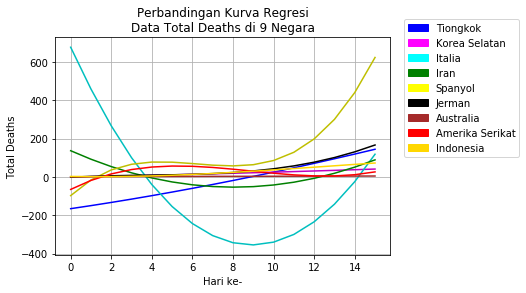

In [647]:
plt.plot(date_all[0:16],yreg_chi_dth[0:16],'b')
plt.plot(date_all[0:16],yreg_kor_dth[0:16],'m')
plt.plot(date_all[0:16],yreg_ita_dth[0:16],'c')
plt.plot(date_all[0:16],yreg_iran_dth[0:16],'g')
plt.plot(date_all[0:16],yreg_spa_dth[0:16],'y')
plt.plot(date_all[0:16],yreg_ger_dth[0:16],'k')
plt.plot(date_all[0:16],yreg_aus_dth[0:16],'brown')
plt.plot(date_all[0:16],yreg_usa_dth[0:16],'r')
plt.plot(date_all[0:16],yreg_ina_dth,'gold')
plt.grid()
plt.title('Perbandingan Kurva Regresi\nData Total Deaths di 9 Negara')
plt.xlabel('Hari ke-')
plt.ylabel('Total Deaths')

blue_patch = mpatches.Patch(color='blue', label='Tiongkok')
magenta_patch = mpatches.Patch(color='magenta', label='Korea Selatan')
cyan_patch = mpatches.Patch(color='cyan', label='Italia')
green_patch = mpatches.Patch(color='green', label='Iran')
yellow_patch = mpatches.Patch(color='yellow', label='Spanyol')
black_patch = mpatches.Patch(color='black', label='Jerman')
brown_patch = mpatches.Patch(color='brown', label='Australia')
red_patch = mpatches.Patch(color='red', label='Amerika Serikat')
gold_patch = mpatches.Patch(color='gold', label='Indonesia')
plt.legend(handles=[blue_patch,magenta_patch,cyan_patch,green_patch,yellow_patch,black_patch,brown_patch,red_patch,gold_patch]
           , loc=(1.04,0.45))

Pada grafik di atas kita bisa melihat laju kematian akibat COVID-19 di 9 negara. Posisi pertama ditempati Spanyol. Ini didukung oleh artikel yang dimuat di laman berita *Republika.co.id* yang mengatakan bahwa di Spanyol, distribusi alat pelindung diri sangatlah buruk. Bahkan Konfederasi Serikat Medis Amerika Serikat, atau yang biasa disingkat CESM, menuding bahwa Kementerian Kesehatan di negara tersebut gagal memberikan perlindungan yang memadahi bagi tenaga medis. 

Pada grafik ini posisi kedua dan ketiga masih diduduki Jerman dan Tiongkok. Namun, apabila melihat kurva keempat, yaitu Italia, kemiringannya paling tajam dibanding grafik lainnya. Ini yang membuat Italia kini menjadi salah satu negara dengan korban meninggal terbanyak, bersama dengan Spanyol. Hal ini didukung oleh data yang dikeluarkan *The New York Times* bahwa 23% penduduk di sana berusia di atas 65 tahun, yang mana semakin bertambah usia, semakin menurun sistem kekebalan tubuh seseorang. Ini terbukti dengan mayoritas penduduk Italia yang meninggal ialah orang-orang dengan usia senja, yaitu di atas 70-80 tahun. 

Kurva selanjutnya yang akan menunjukkan peningkatan cukup tinggi yaitu Iran dan Amerika Serikat. Untuk negara Iran telah disebutkan sebelumnya bahwa penyebab negara ini cukup kewalahan ialah karena pembatasan-pembatasan yang dilakukan Amerika Serikat terkait distribusi obat-obatan dan lain-lain ke sana. Di Amerika Serikat, peningkatan terjadi cukup tinggi karena seperti dilansir dari *BBC*, presiden mereka, Trump, awalnya menganggap remeh dampak yang ditimbulkan dari virus ini. Ia juga malah membandingkan jumlah kematian akibat virus ini yang masih kalah daripada akibat yang ditimbulkan oleh flu biasa, meskipun belakangan ini disebutkan bahwa ia sudah menyadari dampak yang ditimbulkan dan mulai memperbaharui kebijakannya. Sedangkan di negara lainnya yang belum disebutkan trennya cenderung meningkat sedikit hingga sedang.


# G. MENENTUKAN KEADAAN NEGARA YANG MIRIP DENGAN INDONESIA

## G.1. Data *Active Cases*

Untuk menentukan negara mana yang memiliki keadaan paling mirip dengan Indonesia, di sini digunakan perhitungan jarak Eucledian (*Eucledian Distance*). Perhitungan ini menghitung jarak antar 2 titik pada 2 garis yang berbeda, di sini setiap garis menggambarkan suatu negara. Semakin kecil hasil yang didapat, berarti tingkat kemiripan keadaan semakin mirip.

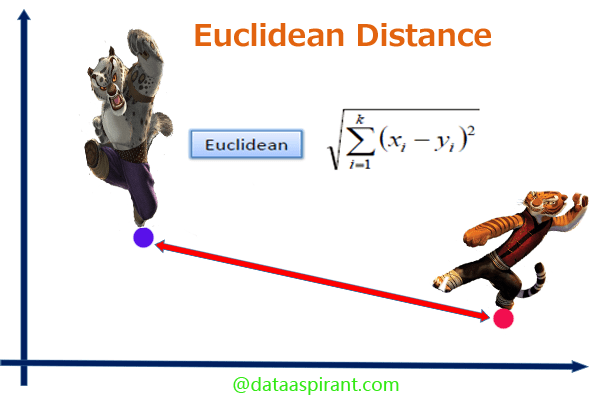

In [648]:
A = yreg_chi_act[0:25]
B = yreg_kor_act[0:25]
C = yreg_ita_act[0:25]
D = yreg_iran_act[0:25]
E = yreg_spa_act[0:25]
F = yreg_ger_act[0:25]
G = yreg_aus_act[0:25]
H = yreg_usa_act[0:25]
I = yreg_ina_act

distance1 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, H)]))
distance2 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, G)]))
distance3 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, F)]))
distance4 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, E)]))
distance5 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, D)]))
distance6 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, C)]))
distance7 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, B)]))
distance8 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, A)]))

print("Jarak Euclidean dari I ke H: ",distance1)
print("Jarak Euclidean dari I ke G: ",distance2)
print("Jarak Euclidean dari I ke F: ",distance3)
print("Jarak Euclidean dari I ke E: ",distance4)
print("Jarak Euclidean dari I ke D: ",distance5)
print("Jarak Euclidean dari I ke C: ",distance6)
print("Jarak Euclidean dari I ke B: ",distance7)
print("Jarak Euclidean dari I ke A: ",distance8)

Jarak Euclidean dari I ke H:  508.6685247301663
Jarak Euclidean dari I ke G:  1691.292870131312
Jarak Euclidean dari I ke F:  8751.06752268452
Jarak Euclidean dari I ke E:  27772.055398588505
Jarak Euclidean dari I ke D:  17086.813076525843
Jarak Euclidean dari I ke C:  16649.13474832509
Jarak Euclidean dari I ke B:  18136.818849919277
Jarak Euclidean dari I ke A:  144409.8306488679


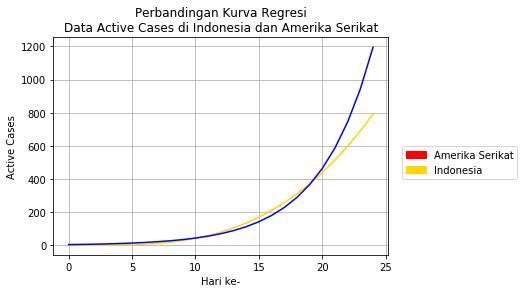

In [650]:
plt.plot(date_all,yreg_ina_act,'gold')
plt.plot(date_all,yreg_usa_act[0:25],'b')
plt.grid()
plt.title('Perbandingan Kurva Regresi\nData Active Cases di Indonesia dan Amerika Serikat')
plt.xlabel('Hari ke-')
plt.ylabel('Active Cases')

red_patch = mpatches.Patch(color='red', label='Amerika Serikat')
gold_patch = mpatches.Patch(color='gold', label='Indonesia')
plt.legend(handles=[red_patch,gold_patch]
           , loc=(1.04,0.35))

## G.2. Data *Total Deaths*

In [651]:
A = yreg_chi_dth[0:16]
B = yreg_kor_dth[0:16]
C = yreg_ita_dth[0:16]
D = yreg_iran_dth[0:16]
E = yreg_spa_dth[0:16]
F = yreg_ger_dth[0:16]
G = yreg_aus_dth[0:16]
H = yreg_usa_dth[0:16]
I = yreg_ina_dth

jarak1 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, H)]))
jarak2 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, G)]))
jarak3 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, F)]))
jarak4 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, E)]))
jarak5 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, D)]))
jarak6 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, C)]))
jarak7 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, B)]))
jarak8 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(I, A)]))

print("Jarak Euclidean dari I ke H: ",jarak1)
print("Jarak Euclidean dari I ke G: ",jarak2)
print("Jarak Euclidean dari I ke F: ",jarak3)
print("Jarak Euclidean dari I ke E: ",jarak4)
print("Jarak Euclidean dari I ke D: ",jarak5)
print("Jarak Euclidean dari I ke C: ",jarak6)
print("Jarak Euclidean dari I ke B: ",jarak7)
print("Jarak Euclidean dari I ke A: ",jarak8)

Jarak Euclidean dari I ke H:  158.74514200552872
Jarak Euclidean dari I ke G:  132.69024793266962
Jarak Euclidean dari I ke F:  126.2276599774294
Jarak Euclidean dari I ke E:  751.9784664895992
Jarak Euclidean dari I ke D:  259.5209555680638
Jarak Euclidean dari I ke C:  1270.9307821891957
Jarak Euclidean dari I ke B:  56.82823774405657
Jarak Euclidean dari I ke A:  349.95520462136795


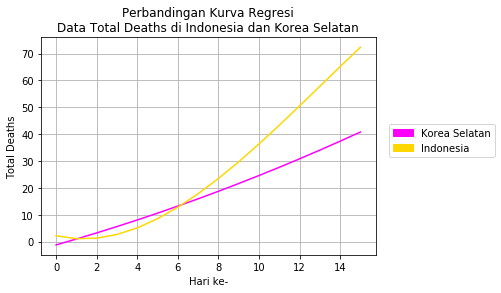

In [652]:
plt.plot(date_all[0:16],yreg_kor_dth[0:16],'magenta')
plt.plot(date_all[0:16],yreg_ina_dth,'gold')
plt.grid()
plt.title('Perbandingan Kurva Regresi\nData Total Deaths di Indonesia dan Korea Selatan')
plt.xlabel('Hari ke-')
plt.ylabel('Total Deaths')

magenta_patch = mpatches.Patch(color='magenta', label='Korea Selatan')
gold_patch = mpatches.Patch(color='gold', label='Indonesia')
plt.legend(handles=[magenta_patch,gold_patch]
           , loc=(1.04,0.45))

dari dua perhitungan di atas, dapat disimpulkan bahwa keadaan di Indonesia (*active cases*) paling mirip dengan keadaan di Amerika Serikat. Sedangkan untuk *total deaths*, keadaan di Indonesia paling mirip dengan keadaan di Korea Selatan.